# KNOW(한국직업정보)기반 직업 추천 프로젝트 [Team. MAC-THREE]

## 1. 프로젝트 개요

### (1) 프로젝트 주제
- 머신러닝 기반 직업 추천 시스템
    - 최근 3년치 KNOW 재직자 조사 데이터를 통합・변형하여 구직자 대상 설문지를 개발하고 응답에 따른 추천 직업을 시각화하여 제시하는 서비스를 구현

### (2) 동기 및 목적
- 코로나19로 심각해진 취업난 속 직업 선택에 대한 새로운 시각 제공 필요성 절감  
(참고 기사: "취준생 86만명 사상최대…세명 중 한명은 "공무원 준비"", <매일경제>, 2021.07.20. [https://www.mk.co.kr/news/society/view/2021/07/698992/])
- ☞ KNOW 재직자 조사 데이터를 분석・활용하여 직업과 연관이 높은 설문지 문항 및 영향변수를 발굴하고, 이에 기반한 직업 추천 알고리즘을 개발하고자 함

### (3) 수행 기간
- 2021.12.07 ~ 2021.12.21

## 2. 데이터 개요

### (1) KNOW 소개
- 정식 명칭은 한국직업정보시스템(Korea Network of Occupations and Workers; KNOW) 재직자 조사
- 한국고용정보원이 청소년과 성인의 진로 및 경력설계, 진로상담, 구인, 구직 등에 도움을 주기 위해서 2001년부터 개발, 운영중
- 다양한 직업에 종사하고 있는 재직자에 대하여 직무관련 조사를 수행하고 있으며, 주요 조사 내용은 매년 달라짐

### (2) 데이터셋 구성
- 연도별 140~180여 개 질문에 대한 8~9천여 명의 재직자 응답 데이터와 설문지 (조사 대상 직업들을 약 530가지 직업 코드로 표현)
- 문항(컬럼) 구성
    - 2018년 : 업무환경(cq) 및 흥미(iq)
    - 2019년 : 지식(kq) 및 성격(sq)
    - 2020년 : 업무수행능력(saq) 및 가치관(vq)
    - 공통(매년 세부 문항은 일부 변형됨) : 개인정보 및 기타 특성(bq)

### (3) 데이터 입수 경로
- KNOW기반 직업 추천 알고리즘 경진대회[https://dacon.io/competitions/official/235865/overview/description] (한국고용정보원 주최, 데이콘 주관)

## 3. 데이터 전처리

### (1) 답안 밀림 현상 수정
- 데이터를 불러오기 이전에 csv파일들을 Excel에서 열어 확인해보니 주관식으로 작성되었어야 할 항목에 일부 숫자가 포함된 것을 발견함 (2018, 2019년 파일)
- csv 파일의 식별자 인식 문제로 일부 행에 대하여 밀려서 표기된 부분이 있는 것으로 파악, 해당 부분을 수동으로 바로잡아 별도의 파일로 저장하여 사용함

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
k2018 = pd.read_csv('../data/KNOW_2018_preprocessed.csv')
k2018

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
0,9486,5,3,4,2,2,5,4,5,4,...,치기공과,1,1.0,NaN,1.0,42.0,3800.0,3400.0,NaN,306301
1,9487,4,3,4,4,4,4,4,4,4,...,이과,1,2.0,NaN,1.0,40.0,2300.0,1800.0,NaN,133204
2,9488,4,1,5,3,3,4,2,4,1,...,기계과,2,NaN,6.0,NaN,30.0,NaN,NaN,3000.0,702502
3,9489,4,3,4,4,4,3,3,2,3,...,물리 과학,1,1.0,NaN,1.0,40.0,3350.0,2750.0,NaN,121201
4,9490,3,2,3,1,1,4,3,4,3,...,치기공학,1,1.0,NaN,1.0,40.0,2500.0,2300.0,NaN,306301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9068,18565,5,5,5,3,3,5,4,4,4,...,국문과,2,NaN,6.0,NaN,52.0,NaN,NaN,5000.0,615203
9069,18566,4,4,4,3,3,5,4,4,4,...,의대,2,NaN,5.0,NaN,38.0,NaN,NaN,9000.0,301106
9070,18567,5,2,3,2,3,5,4,4,3,...,의예,2,NaN,5.0,NaN,56.0,NaN,NaN,6500.0,301112
9071,18568,5,4,5,4,3,5,4,1,4,...,컴퓨터공학,1,1.0,NaN,1.0,40.0,4200.0,2800.0,NaN,133101


In [3]:
k2019 = pd.read_csv('../data/KNOW_2019_preprocessed.csv')
k2019

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,...,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode
0,18569.0,4,4,4,3,4,4,4,4,4,...,기계공학과,1,1.0,NaN,1.0,40.0,3500.0,3000.0,NaN,812301
1,18570.0,4,3,4,4,4,4,3,4,5,...,경영학,2,NaN,5.0,NaN,40.0,NaN,NaN,5000.0,15201
2,18571.0,2,3,2,2,2,2,2,2,3,...,NaN,2,NaN,6.0,NaN,30.0,NaN,NaN,3000.0,901101
3,18572.0,5,5,5,5,5,5,5,5,5,...,행정학,1,1.0,NaN,1.0,40.0,3600.0,2400.0,NaN,29903
4,18573.0,1,4,4,1,1,2,4,3,4,...,NaN,2,NaN,6.0,NaN,45.0,NaN,NaN,1500.0,561401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,27124.0,3,3,4,4,4,4,4,3,3,...,상업과,1,3.0,NaN,1.0,40.0,2400.0,1600.0,NaN,615301
8553,27125.0,3,3,3,1,4,4,3,2,3,...,기계,1,1.0,NaN,1.0,48.0,4500.0,2800.0,NaN,811901
8554,27126.0,5,5,5,5,5,3,3,4,4,...,항공정비공학,1,1.0,NaN,1.0,60.0,3500.0,3000.0,NaN,812101
8555,NaN,3,4,3,2,4,4,4,4,3,...,의류학과,1,1.0,NaN,1.0,50.0,3600.0,1850.0,NaN,415202


In [4]:
k2020 = pd.read_csv('../data/KNOW_2020.csv')
k2020

,idx,saq1_1,saq1_2,saq2_1,saq2_2,saq3_1,saq3_2,saq4_1,saq4_2,saq5_1,...,bq26,bq26_1,bq27_1,bq27_2,bq28,bq29,bq30_1,bq30_2,bq30_3,knowcode
0,27127,4,4,4,4,4,5,4,5,3,...,4,간호학,1,1,1,40,4000,2600,,304003
1,27128,5,6,5,6,4,5,4,5,4,...,4,기계공학,1,1,1,40,4000,3000,,221401
2,27129,3,4,3,4,3,4,3,5,3,...,4,기계,1,1,1,48,4300,3000,,815001
3,27130,4,5,2,3,3,3,4,5,3,...,4,보건학,1,1,1,40,3500,3300,,304003
4,27131,5,6,4,5,3,5,4,4,4,...,4,건축설비공학,1,1,1,40,5700,2700,,140201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8117,35244,4,6,3,5,3,3,1,,5,...,6,지구과학,1,1,1,40,5100,4000,,121105
8118,35245,3,4,4,5,2,4,4,6,1,...,4,광고학,1,1,1,45,3100,2600,,26102
8119,35246,5,6,3,4,3,4,4,5,5,...,4,국문,1,1,1,40,8000,3000,,31301
8120,35247,5,6,5,5,4,5,3,3,3,...,5,화학공학,1,1,1,40,5700,3200,,154105


#### 데이터 정보 확인
- 2018년 : 응답자 9073명, 문항 140개 (주제: 업무환경 및 흥미)
- 2019년 : 응답자 8557명, 문항 152개 (주제: 지식 및 성격)
- 2020년 : 응답자 8122명, 문항 184개 (주제: 업무수행능력 및 가치관)

In [5]:
k2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9073 entries, 0 to 9072
Columns: 141 entries, idx to knowcode
dtypes: float64(35), int64(93), object(13)
memory usage: 9.8+ MB


In [6]:
k2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Columns: 153 entries, idx to knowcode
dtypes: float64(11), int64(132), object(10)
memory usage: 10.0+ MB


In [7]:
k2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8122 entries, 0 to 8121
Columns: 185 entries, idx to knowcode
dtypes: int64(129), object(56)
memory usage: 11.5+ MB


### (2) 공백 대체
- 객관식 문항에서 공백으로 표기된 응답은 해당 능력 혹은 지식 등이 직무에서 중요하지 않아 특별한 수준이 요구되지 않음을 의미
- 주관식 문항에서 공백으로 표기된 응답은 학력이 중졸 이하라서 전공 작성란을 비워둬야 했음을 의미
- → 해당 응답을 모두 0으로 대체

In [8]:
k2018 = k2018.replace(' ', 0)
for col in k2018.columns:
    try:
        k2018[col] = k2018[col].astype(int)
    except:
        continue

In [9]:
k2019 = k2019.replace(' ', 0)
for col in k2019.columns:
    try:
        k2019[col] = k2019[col].astype(int)
    except:
        continue

In [10]:
k2020 = k2020.replace(' ', 0)
for col in k2020.columns:
    try:
        k2020[col] = k2020[col].astype(int)
    except:
        continue

### (3) 문항 선별
- 통합 설문 개발 시 3년치 조사의 모든 문항을 다 사용하기엔 공통 문항을 제외해도 400여 개로 그 수가 너무 많으므로 선택적으로 취할 필요가 있음
- i. 통계 분석 기반
    - 같은 직업을 가진 재직자들 간 응답이 유사했던 문항 위주로 선택 시도
    - 각 문항에 대하여 직업별 표준편차를 살펴보고 그 평균이 1.5를 넘는 객관식 문항은 모두 제외  
    (단, bq1은 업종에 대한 문항으로 21개 보기 중 택한 것이라 편차가 크게 나올 수밖에 없음을 참작하여 예외적으로 포함시킴)
    - 문항 분류별 균형을 고려하여 기준을 1.3 또는 1.0으로 적용한 경우도 있음
- ii. 내용 분석 기반
    - 프로젝트 목적에 적합한 문항 위주로 선택
        - ex) 근로소득 관련 문항: 직업에 따라 소득 수준이 상이하여 직업을 추천받고자 하는 사람이 희망 연봉을 특정하여 답하기는 어려울 것으로 판단되므로 제외
    - 특정 능력이나 지식 등에 대하여 중요도를 묻는 문항과 요구되는 수준을 묻는 문항이 연결되어 나타나는 경우, 수준을 중심으로 문항 통합
- ☞ 최종적으로 122개 문항을 선정, 사용할 컬럼은 knowcode 포함 123개로 정리

#### 통계 요약 파일 생성

In [11]:
des_2018 = k2018.groupby('knowcode').describe().T
des_2018.head(20)

knowcode         11101         11102         11201         12101   \
idx count     15.000000     16.000000     15.000000     18.000000   
    mean   13506.066667  12932.500000  13502.866667  13634.777778   
    std     1918.301089   3232.402491   2546.281150   3001.677463   
    min    11148.000000   9539.000000  10142.000000   9883.000000   
    25%    11958.500000   9798.750000  11428.000000  10782.500000   
    50%    13385.000000  12414.500000  12755.000000  13584.500000   
    75%    15036.500000  15972.500000  15401.500000  16154.500000   
    max    16605.000000  18345.000000  18533.000000  18173.000000   
cq1 count     15.000000     16.000000     15.000000     18.000000   
    mean       4.800000      4.500000      4.666667      4.777778   
    std        0.414039      0.516398      0.487950      0.427793   
    min        4.000000      4.000000      4.000000      4.000000   
    25%        5.000000      4.000000      4.000000      5.000000   
    50%        5.000000      4.500000      5.000000      5.000000   
    75%        5.000000      5.000000      5.000000      5.000000   
    max        5.000000      5.000000      5.000000      5.000000   
cq2 count     15.000000     16.000000     15.000000     18.000000   
    mean       4.066667      3.625000      3.600000      3.277778   
    std        0.883715      0.718795      0.736788      0.894792   
    min        2.000000      3.000000      2.000000      2.000000   

knowcode         12102         12201         12301         12401   \
idx count     15.000000     15.000000     15.000000     15.000000   
    mean   13834.666667  14716.533333  13811.466667  14645.400000   
    std     1736.579095   3018.184787   2511.755614   2706.261887   
    min    11767.000000  10541.000000   9989.000000  10512.000000   
    25%    12608.000000  11611.000000  11380.500000  13100.000000   
    50%    13260.000000  15766.000000  14878.000000  13602.000000   
    75%    14694.000000  17318.000000  15414.500000  17539.000000   
    max    18039.000000  18478.000000  17860.000000  18554.000000   
cq1 count     15.000000     15.000000     15.000000     15.000000   
    mean       4.933333      4.466667      4.666667      4.866667   
    std        0.258199      0.639940      0.487950      0.351866   
    min        4.000000      3.000000      4.000000      4.000000   
    25%        5.000000      4.000000      4.000000      5.000000   
    50%        5.000000      5.000000      5.000000      5.000000   
    75%        5.000000      5.000000      5.000000      5.000000   
    max        5.000000      5.000000      5.000000      5.000000   
cq2 count     15.000000     15.000000     15.000000     15.000000   
    mean       2.666667      3.066667      3.600000      3.466667   
    std        0.975900      1.099784      0.736788      1.245946   
    min        1.000000      1.000000      2.000000      1.000000   

knowcode         12402         13101   ...        901101        901201  \
idx count     15.000000     15.000000  ...     15.000000     15.000000   
    mean   14558.666667  14192.666667  ...  14176.866667  13625.933333   
    std     2056.025454   2313.238906  ...   1940.386113   2891.551721   
    min    11074.000000  10743.000000  ...  11642.000000  10002.000000   
    25%    12766.500000  12767.000000  ...  12487.500000  10645.500000   
    50%    15312.000000  13712.000000  ...  14176.000000  14369.000000   
    75%    16108.500000  15544.000000  ...  15464.500000  15823.000000   
    max    17507.000000  18035.000000  ...  17588.000000  17840.000000   
cq1 count     15.000000     15.000000  ...     15.000000     15.000000   
    mean       4.800000      4.600000  ...      2.666667      3.733333   
    std        0.414039      0.632456  ...      0.975900      0.703732   
    min        4.000000      3.000000  ...      1.000000      3.000000   
    25%        5.000000      4.000000  ...      2.000000      3.000000   
    50%        5.000000      5.000000  ...      2.000000      4.

In [12]:
des_2018.to_csv('../data/des2018.csv')

In [13]:
des_2019 = k2019.groupby('knowcode').describe().T
des_2019.head(20)

knowcode         11102         11201         12101         12201   \
idx count     15.000000     15.000000     15.000000     15.000000   
    mean   23399.400000  21039.333333  23594.000000  22465.200000   
    std     2638.216627   2532.040670   2235.168130   1892.842579   
    min    19143.000000  18760.000000  19941.000000  19926.000000   
    25%    20962.000000  19123.000000  22145.000000  21080.000000   
    50%    23913.000000  20149.000000  23136.000000  22161.000000   
    75%    25501.500000  22419.000000  25291.500000  23221.500000   
    max    26812.000000  26933.000000  26856.000000  26980.000000   
sq1 count     15.000000     15.000000     15.000000     15.000000   
    mean       4.266667      4.466667      3.933333      3.866667   
    std        0.798809      0.639940      0.798809      0.833809   
    min        3.000000      3.000000      2.000000      2.000000   
    25%        4.000000      4.000000      4.000000      3.500000   
    50%        4.000000      5.000000      4.000000      4.000000   
    75%        5.000000      5.000000      4.000000      4.000000   
    max        5.000000      5.000000      5.000000      5.000000   
sq2 count     15.000000     15.000000     15.000000     15.000000   
    mean       3.800000      4.000000      3.733333      4.000000   
    std        0.861892      0.755929      0.883715      1.000000   
    min        2.000000      2.000000      2.000000      2.000000   

knowcode         12301         12401         12402         13101   \
idx count     15.000000     16.000000     15.000000     15.000000   
    mean   22336.733333  21187.312500  22876.266667  22160.133333   
    std     2352.521670   2545.855055   2547.563527   3085.978633   
    min    18827.000000  18589.000000  19877.000000  18809.000000   
    25%    20726.500000  19120.000000  21026.500000  19271.500000   
    50%    21867.000000  20668.500000  21729.000000  22089.000000   
    75%    23741.500000  22096.750000  24717.500000  24876.000000   
    max    26674.000000  27075.000000  27093.000000  27094.000000   
sq1 count     15.000000     16.000000     15.000000     15.000000   
    mean       4.266667      4.375000      4.600000      3.733333   
    std        0.703732      0.619139      0.736788      0.703732   
    min        3.000000      3.000000      3.000000      2.000000   
    25%        4.000000      4.000000      4.500000      3.500000   
    50%        4.000000      4.000000      5.000000      4.000000   
    75%        5.000000      5.000000      5.000000      4.000000   
    max        5.000000      5.000000      5.000000      5.000000   
sq2 count     15.000000     16.000000     15.000000     15.000000   
    mean       3.933333      4.437500      4.466667      3.400000   
    std        0.593617      0.629153      0.639940      1.055597   
    min        3.000000      3.000000      3.000000      1.000000   

knowcode         13201         13202   ...        901101        901201  \
idx count     15.000000     15.000000  ...     15.000000     15.000000   
    mean   24025.066667  23288.866667  ...  20782.466667  22059.800000   
    std     2623.038273   1694.872893  ...   3219.187494   2855.120218   
    min    19751.000000  20706.000000  ...  18571.000000  19011.000000   
    25%    21736.500000  22594.000000  ...  18614.500000  19414.500000   
    50%    25254.000000  23189.000000  ...  19678.000000  21247.000000   
    75%    25934.000000  23997.000000  ...  20804.500000  24164.500000   
    max    26877.000000  26180.000000  ...  27067.000000  27014.000000   
sq1 count     15.000000     15.000000  ...     15.000000     15.000000   
    mean       4.333333      3.866667  ...      2.733333      3.533333   
    std        0.816497      0.833809  ...      0.798809      0.833809   
    min        3.000000      3.000000  ...      1.000000      2.000000   
    25%        4.000000      3.000000  ...      2.000000      3.000000   
    50%        5.000000      4.000000  ...      3.000000      4.

In [14]:
des_2019.to_csv('../data/des2019.csv')

In [15]:
des_2020 = k2020.groupby('knowcode').describe().T
des_2020.head(20)

knowcode            11102         11201         12101         12201   \
idx    count     15.000000     16.000000     15.000000     15.000000   
       mean   32577.666667  31751.312500  29900.800000  32137.800000   
       std     1824.908713   2067.684719   2091.248916   2260.786216   
       min    30347.000000  28450.000000  27490.000000  28530.000000   
       25%    30891.000000  30290.500000  28313.500000  30037.500000   
       50%    32557.000000  31996.000000  29455.000000  32603.000000   
       75%    34309.000000  33311.250000  30867.500000  34033.000000   
       max    35100.000000  34521.000000  35172.000000  35104.000000   
saq1_1 count     15.000000     16.000000     15.000000     15.000000   
       mean       4.866667      4.062500      4.333333      3.866667   
       std        0.351866      0.853913      0.816497      0.743223   
       min        4.000000      2.000000      3.000000      3.000000   
       25%        5.000000      4.000000      4.000000      3.000000   
       50%        5.000000      4.000000      5.000000      4.000000   
       75%        5.000000      5.000000      5.000000      4.000000   
       max        5.000000      5.000000      5.000000      5.000000   
saq1_2 count     15.000000     16.000000     15.000000     15.000000   
       mean       6.333333      5.125000      5.666667      4.866667   
       std        0.617213      0.957427      1.046536      0.915475   
       min        5.000000      3.000000      3.000000      3.000000   

knowcode            12301         12401         12402         13101   \
idx    count     15.000000     16.000000     15.000000     15.000000   
       mean   31417.933333  31391.250000  31836.866667  32342.133333   
       std     2383.654501   2160.819150   2002.528468   1658.650952   
       min    28322.000000  28198.000000  28934.000000  29495.000000   
       25%    29092.500000  29496.500000  30687.500000  31394.500000   
       50%    30689.000000  31580.500000  31151.000000  31966.000000   
       75%    33267.000000  33414.000000  33610.500000  33455.500000   
       max    34912.000000  34778.000000  35164.000000  35173.000000   
saq1_1 count     15.000000     16.000000     15.000000     15.000000   
       mean       3.600000      3.875000      4.000000      4.466667   
       std        0.632456      0.500000      0.845154      0.833809   
       min        3.000000      3.000000      2.000000      3.000000   
       25%        3.000000      4.000000      4.000000      4.000000   
       50%        4.000000      4.000000      4.000000      5.000000   
       75%        4.000000      4.000000      4.500000      5.000000   
       max        5.000000      5.000000      5.000000      5.000000   
saq1_2 count     15.000000     16.000000     15.000000     15.000000   
       mean       4.333333      4.750000      4.933333      5.400000   
       std        0.617213      0.856349      0.457738      0.985611   
       min        3.000000      4.000000      4.000000      4.000000   

knowcode            13201         13202   ...        901101        901201  \
idx    count     15.000000     15.000000  ...     15.000000     15.000000   
       mean   30946.600000  31773.800000  ...  32395.266667  29540.733333   
       std     2591.895688   2288.157624  ...   2324.167792   2349.988160   
       min    27774.000000  28105.000000  ...  28756.000000  27155.000000   
       25%    28875.000000  30048.500000  ...  30326.000000  27830.000000   
       50%    29767.000000  32755.000000  ...  33154.000000  28311.000000   
       75%    33127.000000  33444.000000  ...  34214.500000  31433.000000   
       max    34763.000000  34919.000000  ...  35093.000000  34179.000000   
saq1_1 count     15.000000     15.000000  ...     15.000000     15.000000   
       mean       4.000000      3.600000  ...      2.000000      2.400000   
       std        0.845154      0.632456  ...      0.654654      0.736788   
       min        2.000000      3.000000  ...     

In [16]:
des_2020.to_csv('../data/des2020.csv')

#### knowcode 포함 총 123개 컬럼 선택
- 통계 요약 파일과 설문지 파일을 참고하여 MS Excel에서 컬럼 정보를 종합하여 know_stat_meta.xlsx 파일로 정리
- 직업 예측에 사용할 122개 문항 최종 선정, knowcode 포함 총 123개 컬럼을 사용하기로 결정

In [11]:
cols2018 = ['cq1','cq3','cq4','cq7','cq8','cq9','cq12','cq13','cq14','cq15','cq17','cq19','cq20','cq21','cq22','cq23','cq24','cq25','cq26','cq27','cq28','cq29','cq30','cq31','cq33','cq35','cq36','cq37','cq40','cq41','cq42','cq43','cq44','cq45','cq47','cq48','cq50_1','cq50_2','cq50_3','cq50_4','cq50_5','cq50_6','cq50_7','cq50_8','iq1','iq2','iq3','iq4','iq5','iq6']

In [12]:
cols2019 = ['sq1','sq2','sq3','sq4','sq5','sq6','sq7','sq8','sq9','sq10','sq11','sq12','sq13','sq14','sq15','sq16','kq2_2','kq3_2','kq7_2','kq8_2','kq10_2','kq11_2','kq12_2','kq13_2','kq15_2','kq16_2','kq17_2','kq20_2','kq21_2','kq24_2','kq25_2','kq26_2','kq27_2','kq28_2','kq30_2','kq33_2']

In [13]:
cols2020 = ['saq1_2','saq2_2','saq3_2','saq4_2','saq6_2','saq8_2','saq9_2','saq13_2','saq15_2','saq21_2','saq22_2','saq23_2','saq34_2','saq43_2','saq44_2','vq1','vq2','vq3','vq4','vq5','vq6','vq7','vq8','vq9','vq10','vq11','vq12','vq13','bq1','bq2','bq7','bq9','bq10','bq11','bq24','bq26_1','knowcode']

### (4) knowcode별 응답자 수 정리 및 DataFrame 병합
- KNOW 재직자 조사는 매년 동일인이 응답하는 게 아닌데다 응답자 수도 상이하여, 통합 설문 형태에 맞춰 3년치 DataFrame을 병합하고자 할 때 기준이 될 키값이 존재하지 않음
- 이를 해결하기 위해 3개년의 직업별 응답자 수를 통일하여 동일인의 응답인 것처럼 임의로 매치하여 이어붙이기로 결정
- 예를 들어 특정 직업이 2018년에 18명, 2019년에 15명, 2020년에 15명 조사됐다면, 15명까지 데이터를 차례로 이어붙이고 이후에 남는 2018년의 3명 분 데이터는 사용하지 않음

#### knowcode별 응답자 수 조사

In [14]:
cnt18 = k2018['knowcode'].value_counts()
cnt19 = k2019['knowcode'].value_counts()
cnt20 = k2020['knowcode'].value_counts()
cnt_df = pd.DataFrame({'y18': cnt18, 'y19': cnt19, 'y20': cnt20})
cnt_df = cnt_df.dropna(axis=0)
cnt_df

,y18,y19,y20
11102,16.0,15.0,15.0
11201,15.0,15.0,16.0
12101,18.0,15.0,15.0
12201,15.0,15.0,15.0
12301,15.0,15.0,15.0
...,...,...,...
902101,16.0,15.0,15.0
902201,15.0,15.0,15.0
903101,15.0,15.0,15.0
904101,15.0,15.0,15.0


In [15]:
cnt_df['min'] = cnt_df.min(axis=1)
cnt_df

,y18,y19,y20,min
11102,16.0,15.0,15.0,15.0
11201,15.0,15.0,16.0,15.0
12101,18.0,15.0,15.0,15.0
12201,15.0,15.0,15.0,15.0
12301,15.0,15.0,15.0,15.0
...,...,...,...,...
902101,16.0,15.0,15.0,15.0
902201,15.0,15.0,15.0,15.0
903101,15.0,15.0,15.0,15.0
904101,15.0,15.0,15.0,15.0


In [16]:
cnt_df.to_csv('../data/count_dropna.csv')

#### 기준 인원에 맞춰 응답자 정리

In [17]:
cnt = pd.read_csv('../data/count_dropna.csv')
cnt.head()

,Unnamed: 0,y18,y19,y20,min
0,11102,16.0,15.0,15.0,15.0
1,11201,15.0,15.0,16.0,15.0
2,12101,18.0,15.0,15.0,15.0
3,12201,15.0,15.0,15.0,15.0
4,12301,15.0,15.0,15.0,15.0


In [18]:
cnt.rename(columns={'Unnamed: 0': 'knowcode'}, inplace=True)
cnt.head(3)

,knowcode,y18,y19,y20,min
0,11102,16.0,15.0,15.0,15.0
1,11201,15.0,15.0,16.0,15.0
2,12101,18.0,15.0,15.0,15.0


In [19]:
k2018_mod = pd.DataFrame(columns=k2018.columns)
k2018_mod

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode


In [20]:
for i, row in cnt.iterrows():
    k2018_mod = pd.concat([k2018_mod, k2018[k2018.knowcode==row[0]].head(int(row[4]))])
k2018_mod

,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
53,9539,5,4,4,4,4,4,4,5,4,...,행정학,1,1.0,NaN,1.0,44.0,9500.0,7200.0,NaN,11102
147,9633,4,3,5,5,4,5,4,3,5,...,정치,1,1.0,NaN,1.0,40.0,12000.0,10000.0,NaN,11102
274,9760,5,4,5,3,5,5,5,5,4,...,사회학,1,3.0,NaN,1.0,50.0,10000.0,8000.0,NaN,11102
312,9798,4,3,4,4,5,5,4,4,5,...,경영학,1,1.0,NaN,1.0,50.0,8500.0,6500.0,NaN,11102
313,9799,4,3,5,5,4,5,4,3,5,...,경제,1,1.0,NaN,1.0,40.0,11000.0,10000.0,NaN,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,14684,4,1,5,1,1,3,4,3,4,...,NaN,2,NaN,6.0,NaN,30.0,NaN,NaN,3000.0,904201
5376,14868,4,4,5,1,1,4,3,2,4,...,성산수고,2,NaN,6.0,NaN,50.0,NaN,NaN,4000.0,904201
6360,15853,4,1,4,1,1,4,4,4,2,...,NaN,2,NaN,6.0,NaN,64.0,NaN,NaN,4000.0,904201
6983,16477,4,3,4,1,2,4,4,1,4,...,NaN,2,NaN,6.0,NaN,40.0,NaN,NaN,1200.0,904201


In [21]:
k2018_mod.reset_index(inplace=True)
k2018_mod

,index,idx,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,...,bq37_1,bq38,bq38_1,bq38_2,bq39,bq40,bq41_1,bq41_2,bq41_3,knowcode
0,53,9539,5,4,4,4,4,4,4,5,...,행정학,1,1.0,NaN,1.0,44.0,9500.0,7200.0,NaN,11102
1,147,9633,4,3,5,5,4,5,4,3,...,정치,1,1.0,NaN,1.0,40.0,12000.0,10000.0,NaN,11102
2,274,9760,5,4,5,3,5,5,5,5,...,사회학,1,3.0,NaN,1.0,50.0,10000.0,8000.0,NaN,11102
3,312,9798,4,3,4,4,5,5,4,4,...,경영학,1,1.0,NaN,1.0,50.0,8500.0,6500.0,NaN,11102
4,313,9799,4,3,5,5,4,5,4,3,...,경제,1,1.0,NaN,1.0,40.0,11000.0,10000.0,NaN,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,5192,14684,4,1,5,1,1,3,4,3,...,NaN,2,NaN,6.0,NaN,30.0,NaN,NaN,3000.0,904201
7902,5376,14868,4,4,5,1,1,4,3,2,...,성산수고,2,NaN,6.0,NaN,50.0,NaN,NaN,4000.0,904201
7903,6360,15853,4,1,4,1,1,4,4,4,...,NaN,2,NaN,6.0,NaN,64.0,NaN,NaN,4000.0,904201
7904,6983,16477,4,3,4,1,2,4,4,1,...,NaN,2,NaN,6.0,NaN,40.0,NaN,NaN,1200.0,904201


In [22]:
k2019_mod = pd.DataFrame(columns=k2019.columns)
k2019_mod

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,...,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode


In [23]:
for i, row in cnt.iterrows():
    k2019_mod = pd.concat([k2019_mod, k2019[k2019.knowcode==row[0]].head(int(row[4]))])
k2019_mod

,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,sq9,...,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode
574,19143.0,5,5,5,5,5,5,5,4,4,...,행정학,1,3.0,NaN,1.0,50.0,9000.0,9000.0,NaN,11102
792,19361.0,4,4,3,4,3,4,4,3,3,...,행정학,1,1.0,NaN,1.0,50.0,9500.0,8000.0,NaN,11102
1731,20301.0,5,4,5,5,4,4,5,4,4,...,행정학,1,1.0,NaN,1.0,40.0,8000.0,7000.0,NaN,11102
1951,20521.0,4,4,5,4,4,4,4,4,4,...,경영학,1,1.0,NaN,1.0,45.0,8500.0,7500.0,NaN,11102
2833,21403.0,4,3,3,5,4,4,3,4,4,...,행정학,1,1.0,NaN,1.0,40.0,7000.0,5000.0,NaN,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7336,25908.0,4,3,3,4,2,3,2,3,3,...,NaN,2,NaN,6.0,NaN,35.0,NaN,NaN,2500.0,904201
7663,26235.0,4,4,3,1,4,2,4,3,3,...,NaN,2,NaN,6.0,NaN,30.0,NaN,NaN,2100.0,904201
8118,26690.0,3,3,4,1,2,2,1,2,2,...,NaN,2,NaN,6.0,NaN,20.0,NaN,NaN,1500.0,904201
8145,26717.0,3,3,4,2,3,1,3,1,3,...,NaN,2,NaN,6.0,NaN,20.0,NaN,NaN,1800.0,904201


In [24]:
k2019_mod.reset_index(inplace=True)
k2019_mod

,index,idx,sq1,sq2,sq3,sq4,sq5,sq6,sq7,sq8,...,bq27_1,bq28,bq28_1,bq28_2,bq29,bq30,bq31_1,bq31_2,bq31_3,knowcode
0,574,19143.0,5,5,5,5,5,5,5,4,...,행정학,1,3.0,NaN,1.0,50.0,9000.0,9000.0,NaN,11102
1,792,19361.0,4,4,3,4,3,4,4,3,...,행정학,1,1.0,NaN,1.0,50.0,9500.0,8000.0,NaN,11102
2,1731,20301.0,5,4,5,5,4,4,5,4,...,행정학,1,1.0,NaN,1.0,40.0,8000.0,7000.0,NaN,11102
3,1951,20521.0,4,4,5,4,4,4,4,4,...,경영학,1,1.0,NaN,1.0,45.0,8500.0,7500.0,NaN,11102
4,2833,21403.0,4,3,3,5,4,4,3,4,...,행정학,1,1.0,NaN,1.0,40.0,7000.0,5000.0,NaN,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,7336,25908.0,4,3,3,4,2,3,2,3,...,NaN,2,NaN,6.0,NaN,35.0,NaN,NaN,2500.0,904201
7902,7663,26235.0,4,4,3,1,4,2,4,3,...,NaN,2,NaN,6.0,NaN,30.0,NaN,NaN,2100.0,904201
7903,8118,26690.0,3,3,4,1,2,2,1,2,...,NaN,2,NaN,6.0,NaN,20.0,NaN,NaN,1500.0,904201
7904,8145,26717.0,3,3,4,2,3,1,3,1,...,NaN,2,NaN,6.0,NaN,20.0,NaN,NaN,1800.0,904201


In [46]:
k2020_mod = pd.DataFrame(columns=k2020.columns)
k2020_mod

,idx,saq1_1,saq1_2,saq2_1,saq2_2,saq3_1,saq3_2,saq4_1,saq4_2,saq5_1,...,bq26,bq26_1,bq27_1,bq27_2,bq28,bq29,bq30_1,bq30_2,bq30_3,knowcode


In [47]:
for i, row in cnt.iterrows():
    k2020_mod = pd.concat([k2020_mod, k2020[k2020.knowcode==row[0]].head(int(row[4]))])
k2020_mod

,idx,saq1_1,saq1_2,saq2_1,saq2_2,saq3_1,saq3_2,saq4_1,saq4_2,saq5_1,...,bq26,bq26_1,bq27_1,bq27_2,bq28,bq29,bq30_1,bq30_2,bq30_3,knowcode
3220,30347,5,5,4,5,3,3,4,4,3,...,5,정치외교,1,1,1,40,8500,8000,0,11102
3317,30444,5,6,4,6,4,6,5,7,3,...,4,경영학,1,1,1,40,9700,8000,0,11102
3334,30461,5,6,4,4,2,3,2,2,1,...,5,행정학,1,1,1,40,8500,8000,0,11102
3695,30822,4,6,5,6,4,6,5,6,4,...,5,행정학,1,1,1,40,8800,8000,0,11102
3833,30960,5,6,4,6,5,7,5,7,3,...,5,경영학,1,1,1,40,9500,8000,0,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,31786,1,0,2,2,1,0,2,3,1,...,1,0,2,6,1,32,0,0,2200,904201
5407,32534,1,0,2,1,1,0,1,0,1,...,2,문과,2,6,1,40,0,0,2500,904201
5847,32974,1,0,2,2,1,0,2,4,1,...,1,0,2,6,1,24,0,0,1400,904201
6918,34045,1,0,1,0,1,0,1,0,1,...,1,0,2,6,1,32,0,0,2700,904201


In [48]:
k2020_mod.reset_index(inplace=True)
k2020_mod

,index,idx,saq1_1,saq1_2,saq2_1,saq2_2,saq3_1,saq3_2,saq4_1,saq4_2,...,bq26,bq26_1,bq27_1,bq27_2,bq28,bq29,bq30_1,bq30_2,bq30_3,knowcode
0,3220,30347,5,5,4,5,3,3,4,4,...,5,정치외교,1,1,1,40,8500,8000,0,11102
1,3317,30444,5,6,4,6,4,6,5,7,...,4,경영학,1,1,1,40,9700,8000,0,11102
2,3334,30461,5,6,4,4,2,3,2,2,...,5,행정학,1,1,1,40,8500,8000,0,11102
3,3695,30822,4,6,5,6,4,6,5,6,...,5,행정학,1,1,1,40,8800,8000,0,11102
4,3833,30960,5,6,4,6,5,7,5,7,...,5,경영학,1,1,1,40,9500,8000,0,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4659,31786,1,0,2,2,1,0,2,3,...,1,0,2,6,1,32,0,0,2200,904201
7902,5407,32534,1,0,2,1,1,0,1,0,...,2,문과,2,6,1,40,0,0,2500,904201
7903,5847,32974,1,0,2,2,1,0,2,4,...,1,0,2,6,1,24,0,0,1400,904201
7904,6918,34045,1,0,1,0,1,0,1,0,...,1,0,2,6,1,32,0,0,2700,904201


#### 3년치 DataFrame 통합

In [49]:
know_comb = pd.concat([k2018_mod[cols2018], k2019_mod[cols2019], k2020_mod[cols2020]], axis=1)
know_comb

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1,knowcode
0,5,4,4,4,5,4,3,3,5,4,...,4,15,2,5,5,4,5,1,정치외교,11102
1,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,3,4,3,1,경영학,11102
2,5,5,3,5,5,4,4,3,5,4,...,2,15,2,5,4,5,4,1,행정학,11102
3,4,4,4,4,4,5,3,2,5,4,...,4,15,2,5,5,4,3,1,행정학,11102
4,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,4,4,4,1,경영학,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4,5,1,4,3,4,2,3,1,4,...,5,1,4,2,2,5,3,2,0,904201
7902,4,5,1,3,2,4,4,4,3,5,...,5,1,4,2,5,4,4,1,문과,904201
7903,4,4,1,4,4,2,3,2,1,5,...,5,1,4,1,2,4,3,2,0,904201
7904,4,4,1,4,1,4,3,2,1,4,...,4,1,4,1,3,3,3,2,0,904201


In [50]:
know_comb.to_csv('../data/know_comb_raw.csv', index=False)

### (5) 전공 컬럼 가공 및 라벨 인코딩
- '경영', '경영학', '경영과', '경영학과' 등 동일 전공을 조금씩 다르게 표기한 경우가 많음
- 라벨 인코더 적용 시 이러한 답안이 모두 서로 다른 전공으로 취급되는 일을 줄이고자 단어 마지막에 쓰인 '학', '과', '학과'를 제거  
(코사인 유사도를 이용한 자연어처리를 시도할 시 '의예', '의류'가 같은 전공으로 묶이는 등의 문제가 우려됨 - 추후 다른 보완 방법 고안 필요)
- 이후 라벨 인코더 적용

In [51]:
import re

for i, row in know_comb.iterrows():
    try:
        know_comb.loc[i,'bq26_1'] = know_comb.loc[i,'bq26_1'].replace(' ', '')
        know_comb.loc[i,'bq26_1'] = re.sub('[학][과]$', '', know_comb.loc[i,'bq26_1'])
        know_comb.loc[i,'bq26_1'] = re.sub('[과학]$', '', know_comb.loc[i,'bq26_1'])
    except:
        know_comb.loc[i,'bq26_1'] = '0'

In [52]:
from sklearn.preprocessing import LabelEncoder

for col in know_comb.columns:
    try:
        know_comb[col] = know_comb[col].astype(int)
    except:
        try: 
            know_comb[col] = know_comb[col].astype(float)
        except:
            encoder = LabelEncoder()
            know_comb[col] = know_comb[col].map(str)
            know_comb[col] = encoder.fit_transform(know_comb[col])

know_comb.head()

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1,knowcode
0,5,4,4,4,5,4,3,3,5,4,...,4,15,2,5,5,4,5,1,676,11102
1,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,3,4,3,1,27,11102
2,5,5,3,5,5,4,4,3,5,4,...,2,15,2,5,4,5,4,1,831,11102
3,4,4,4,4,4,5,3,2,5,4,...,4,15,2,5,5,4,3,1,831,11102
4,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,4,4,4,1,27,11102


In [53]:
know_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Columns: 123 entries, cq1 to knowcode
dtypes: int64(123)
memory usage: 7.4 MB


In [54]:
know_comb.to_csv('../data/know_comb.csv', index=False)

## 4. 직업 분류 예측 모델

### 3-1. 데이터 분리
- knowcode가 정답 label에 해당하고, 그 외 컬럼들이 features가 됨
- 훈련용 데이터와 테스트용 데이터를 8:2로 분리

In [55]:
X = know_comb.iloc[:,:-1]
y = know_comb['knowcode']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=13)

In [57]:
X_test

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq12,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1
7039,1,1,1,3,1,3,4,4,5,1,...,4,5,3,1,2,4,3,3,2,572
5472,2,2,1,2,3,1,2,2,5,1,...,2,4,14,1,2,4,3,4,1,59
2801,4,4,4,5,5,4,3,3,4,4,...,3,3,13,1,4,2,2,3,1,520
2888,5,5,3,5,3,4,4,4,5,2,...,5,4,16,5,5,4,4,3,1,828
3050,5,5,5,3,4,4,3,3,5,3,...,3,3,16,5,5,3,4,3,2,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,4,5,4,4,4,4,2,2,4,1,...,3,3,17,4,6,4,3,3,2,543
5050,5,1,1,4,4,4,2,2,3,5,...,5,4,18,2,2,4,4,4,2,572
2201,5,5,5,4,4,4,5,4,5,4,...,3,2,3,1,5,3,3,2,2,814
2073,4,5,5,5,5,5,1,2,5,3,...,3,4,6,1,4,4,4,4,2,687


### 3-2. 분류기 적용
- RandomForestClassifier, DecisionTreeClassifier, AdaBoostClassifier, LogisticRegression, LGBMClassifier

#### (1) 분류기 선정
- GradientBoostingClassifier는 시간이 너무 오래 걸리는 관계로 제외함

In [58]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LGBMClassifier', LGBMClassifier()))

#### (2) 모델 학습 및 정확도 측정
- 모두 train score에 비해 test score가 많이 떨어져 과적합이 우려됨
- 그러나 정답 라벨이 500가지가 넘고, 각 라벨 당 데이터가 많아야 16개였던 것을 고려하면 그리 나쁘지 않은 수치일 수도 있다고 생각됨
- 랜덤 포레스트의 test accuracy는 50%를 넘어 5가지 분류기 중 가장 뛰어난 성능을 보여줌

In [59]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.metrics import accuracy_score

train_score = []
test_score = []
names = []

for name, model in tqdm(models):
    clf = model
    clf.fit(X_train, y_train)
    
    y_pred_tr = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    names.append(name)
    test_score.append(accuracy_score(y_test, y_pred_test))
    train_score.append(accuracy_score(y_train, y_pred_tr)) 

100%|██████████| 5/5 [00:50<00:00, 10.13s/it]


In [60]:
result = pd.DataFrame({'model name': names, 'train score': train_score, 'test score': test_score}) 
result

,model name,train score,test score
0,RandomForestClassifier,1.000000,0.508850
1,DecisionTreeClassifier,1.000000,0.220607
2,AdaBoostClassifier,0.007274,0.005689
3,LogisticRegression,0.406230,0.234513
4,LGBMClassifier,0.223751,0.076485


#### (3) 교차검증
- Stratified 5-fold Cross Validation 수행 결과 대부분의 모델에서 정확도의 표준편차가 0.01이 채 되지 않는 것으로 나타나 과적합은 아닌 것으로 판단됨
- Box plot으로 결과를 나타내보면 랜덤 포레스트의 성능이 더욱 두드러져 보임

In [58]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.45793603342172406 0.008975221167285285
DecisionTreeClassifier 0.21442350027517887 0.009453047442258217
AdaBoostClassifier 0.006325236403662379 0.0008669944798971127
LogisticRegression 0.22059188472507132 0.01334157114333961
LGBMClassifier 0.07779806874468403 0.00632680370065079


In [59]:
result_cv = pd.DataFrame(results, index=names, columns=['1','2','3','4','5']) 
result_cv.T

,RandomForestClassifier,DecisionTreeClassifier,AdaBoostClassifier,LogisticRegression,LGBMClassifier
1,0.463241,0.218972,0.007115,0.213439,0.079842
2,0.449012,0.216601,0.004743,0.212648,0.077470
3,0.467984,0.203953,0.006324,0.206324,0.070356
4,0.464032,0.203953,0.006324,0.226877,0.088538
5,0.445411,0.228639,0.007120,0.243671,0.072785


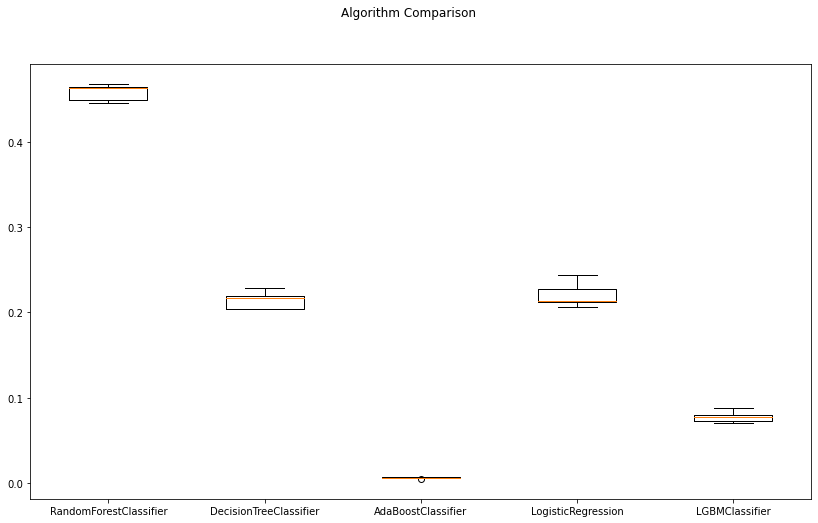

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 3-3. 랜덤 포레스트
- 앞서 시험한 5가지 분류기 중 랜덤 포레스트가 나머지 분류기들과 비교할 때 월등히 좋은 성능을 보여주었음
- 따라서 랜덤 포레스트를 주 분류기로 선정하고, 옵션을 조정함으로써 성능을 더욱 끌어올려 보고자 함

In [45]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split

know_comb = pd.read_csv('../KNOW_data/know_comb.csv')

X = know_comb.iloc[:,:-1]
y = know_comb['knowcode']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=13)

In [142]:
know_comb

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1,knowcode
0,5,4,4,4,5,4,3,3,5,4,...,4,15,2,5,5,4,5,1,676,11102
1,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,3,4,3,1,27,11102
2,5,5,3,5,5,4,4,3,5,4,...,2,15,2,5,4,5,4,1,831,11102
3,4,4,4,4,4,5,3,2,5,4,...,4,15,2,5,5,4,3,1,831,11102
4,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,4,4,4,1,27,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4,5,1,4,3,4,2,3,1,4,...,5,1,4,2,2,5,3,2,1,904201
7902,4,5,1,3,2,4,4,4,3,5,...,5,1,4,2,5,4,4,1,234,904201
7903,4,4,1,4,4,2,3,2,1,5,...,5,1,4,1,2,4,3,2,1,904201
7904,4,4,1,4,1,4,3,2,1,4,...,4,1,4,1,3,3,3,2,1,904201


#### (1) max_depth 조정
- n_estimators는 임의대로 100으로 통일해두고, GridSearchCV를 이용해 max_depth에 변화를 주며 최적의 값을 찾아보고자 함
- 3단계에 걸쳐 범위를 좁혀나가며 시도해본 결과, best는 34로 나타남

##### 1) GridSearchCV: [20, 25, 30, 35, 40] → 30

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [20, 25, 30, 35, 40]}
rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=13)

gridsearch = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1)
gridsearch.fit(X, y)

KeyboardInterrupt: 

In [71]:
gridsearch.best_estimator_, gridsearch.best_score_

(RandomForestClassifier(max_depth=30, random_state=13), 0.5054406347180608)

##### 2) GridSearchCV: [26, 28, 30, 32, 34] → 34

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [26, 28, 30, 32, 34]}
rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=13)

gridsearch = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1)
gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=30, random_state=13),
             n_jobs=-1, param_grid={'max_depth': [26, 28, 30, 32, 34]})

In [15]:
gridsearch.best_estimator_, gridsearch.best_score_

(RandomForestClassifier(max_depth=34, random_state=13), 0.5089822169233094)

##### 3) GridSearchCV: [32, 33, 34, 35] → 34

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [32, 33, 34, 35]}
rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=13)

gridsearch = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1)
gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=30, random_state=13),
             n_jobs=-1, param_grid={'max_depth': [32, 33, 34, 35]})

In [17]:
gridsearch.best_estimator_, gridsearch.best_score_

(RandomForestClassifier(max_depth=34, random_state=13), 0.5089822169233094)

#### (2) n_estimators 조정
- max_depth는 34로 동일하게 적용
- 노트북 과부하 문제로 GridSearchCV를 사용하지 않고 하나씩 천천히 시도
- n_estimators를 키워가며 시도하다 cv_std가 증가하면 과적합이 시작되는 것으로 판단하여 줄여보는 방식으로 값을 찾아가려 하였음
- 그러나 랜덤성의 영향도 있고 워낙 작은 수치였던 탓인지 cv_std의 경향성이 그다지 일관되지 않은 듯 관찰됨
- 

##### 1) n_estimator=100 (cv_mean : 0.5012628631241249 cv_std : 0.01611885152726114)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=34, random_state=13)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.5221238938053098

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
cv_results = cross_val_score(rf, X, y, cv=skfold, scoring='accuracy')

print('cv_mean :', cv_results.mean(), 'cv_std :', cv_results.std())

cv_mean : 0.5012628631241249 cv_std : 0.01611885152726114


##### 2) n_estimator=200 (cv_mean : 0.5638736225292287 cv_std : 0.01401040523837066)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=200, max_depth=34, random_state=13)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.5764854614412137

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
cv_results = cross_val_score(rf, X, y, cv=skfold, scoring='accuracy')

print('cv_mean :', cv_results.mean(), 'cv_std :', cv_results.std())

cv_mean : 0.5638736225292287 cv_std : 0.01401040523837066


##### 3) n_estimator=300 (cv_mean : 0.5819605604160019 cv_std : 0.01058702285608442)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=300, max_depth=34, random_state=13)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.5979772439949431

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
cv_results = cross_val_score(rf, X, y, cv=skfold, scoring='accuracy')

print('cv_mean :', cv_results.mean(), 'cv_std :', cv_results.std())

cv_mean : 0.5819605604160019 cv_std : 0.01058702285608442


##### 4) n_estimator=350 (cv_mean : 0.5890428452282996 cv_std : 0.015158538558131011)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=350, max_depth=34, random_state=13)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.6005056890012642

In [5]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
cv_results = cross_val_score(rf, X, y, cv=skfold, scoring='accuracy')

print('cv_mean :', cv_results.mean(), 'cv_std :', cv_results.std())

cv_mean : 0.5890428452282996 cv_std : 0.015158538558131011


##### 5) n_estimator=400 (cv_mean : 0.5944818806769068 cv_std : 0.015122615215908934)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=400, max_depth=34, random_state=13)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.6080910240202275

In [7]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
cv_results = cross_val_score(rf, X, y, cv=skfold, scoring='accuracy')

print('cv_mean :', cv_results.mean(), 'cv_std :', cv_results.std())

cv_mean : 0.5944818806769068 cv_std : 0.015122615215908934


##### 6) n_estimator=450 (cv_mean : 0.5968849429580567 cv_std : 0.01509544067547527)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=450, max_depth=34, random_state=13)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.6156763590391909

In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
cv_results = cross_val_score(rf, X, y, cv=skfold, scoring='accuracy')

print('cv_mean :', cv_results.mean(), 'cv_std :', cv_results.std())

cv_mean : 0.5968849429580567 cv_std : 0.01509544067547527


##### 7) n_estimator=500 (cv_mean : 0.6004262053094146 cv_std : 0.01631388176115824)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=500, max_depth=34, random_state=13)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.6131479140328698

In [9]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skfold = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
cv_results = cross_val_score(rf, X, y, cv=skfold, scoring='accuracy')

print('cv_mean :', cv_results.mean(), 'cv_std :', cv_results.std())

cv_mean : 0.6004262053094146 cv_std : 0.01631388176115824


---

# best model로 학습

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=450, max_depth=34, random_state=13)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)
acc = accuracy_score(y_test,rf_pred)
acc

0.6156763590391909

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=900, max_depth=34, random_state=13)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)
acc = accuracy_score(y_test,rf_pred)
acc

0.6194690265486725

In [49]:
importances = dict(zip(X_train.columns, rf.feature_importances_))
sort_imp = sorted(importances.items(), key=lambda x:x[1], reverse=True)
for i in range(len(sort_imp)):
    print(i+1, sort_imp[i])

1 ('bq26_1', 0.025148300871961238)
2 ('bq1', 0.023193143020995437)
3 ('bq7', 0.013109312532964958)
4 ('saq44_2', 0.012910395818611455)
5 ('saq43_2', 0.012464075059326254)
6 ('saq3_2', 0.012027423360498111)
7 ('saq1_2', 0.011798487235269054)
8 ('saq34_2', 0.011691916136748793)
9 ('cq49', 0.011642285696736495)
10 ('kq25_2', 0.01156503247562369)
11 ('kq30_2', 0.011560389140144949)
12 ('cq15', 0.011509474335759681)
13 ('saq4_2', 0.011434635333750274)
14 ('kq13_2', 0.011322052240663816)
15 ('saq22_2', 0.01129795843488361)
16 ('saq13_2', 0.011266441344912375)
17 ('saq9_2', 0.011211971131415728)
18 ('saq23_2', 0.011062946412775578)
19 ('cq8', 0.010958550729506467)
20 ('saq2_2', 0.010943655157769032)
21 ('kq2_2', 0.010844357075357297)
22 ('saq8_2', 0.010760028301429877)
23 ('saq15_2', 0.010748240552608496)
24 ('saq21_2', 0.010743823413055123)
25 ('cq17', 0.010742075015112533)
26 ('cq44', 0.01068869523307988)
27 ('saq6_2', 0.01067786367002472)
28 ('iq3', 0.010633239670131692)
29 ('cq36', 0.0104

In [14]:
importances = dict(zip(X_train.columns, rf.feature_importances_))
sort_imp = sorted(importances.items(), key=lambda x:x[1], reverse=True)
for i in range(len(sort_imp)):
    print(i+1, sort_imp[i])

1 ('bq26_1', 0.022787558175988536)
2 ('bq1', 0.021588043037704167)
3 ('bq7', 0.012030371330068533)
4 ('saq44_2', 0.011793016695660855)
5 ('saq43_2', 0.01125993951499865)
6 ('saq3_2', 0.01117787243637364)
7 ('cq15', 0.010690551659953184)
8 ('kq25_2', 0.010661874042696367)
9 ('saq34_2', 0.010650685746411113)
10 ('saq4_2', 0.010635842092893935)
11 ('saq1_2', 0.010578387432694082)
12 ('kq30_2', 0.010394217357843643)
13 ('saq13_2', 0.010276729981953421)
14 ('saq22_2', 0.010241625336232274)
15 ('saq23_2', 0.010234463983890177)
16 ('kq13_2', 0.010176984202867192)
17 ('saq9_2', 0.01015521383773546)
18 ('cq8', 0.010147283970895003)
19 ('kq2_2', 0.010054504219115152)
20 ('saq2_2', 0.009945285869548287)
21 ('saq8_2', 0.009913451865475719)
22 ('saq15_2', 0.009899267154089142)
23 ('cq17', 0.009896094469451664)
24 ('saq6_2', 0.009820749374699152)
25 ('saq21_2', 0.009800356769729686)
26 ('iq3', 0.009698134327854728)
27 ('cq36', 0.009658394001265983)
28 ('cq29', 0.009571092287607993)
29 ('kq3_2', 0.00

## 4. 결과 출력


### 4-1. predict_proba로 데이터프레임 만들기

In [49]:
proba_df=pd.DataFrame(rf_proba).transpose()
proba_df

,0,1,2,3,4,5,6,7,8,9,...,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581
0,0.000000,0.000000,0.001111,0.000000,0.001142,0.000000,0.000000,0.002222,0.016801,0.006667,...,0.000000,0.000000,0.000000,0.001111,0.000000,0.002271,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.003352,0.002222,0.000295,0.000069,0.001111,0.000000,0.000000,0.002222,...,0.003333,0.001111,0.001141,0.000000,0.002222,0.000000,0.000000,0.010000,0.000000,0.001111
2,0.000000,0.000000,0.000000,0.001157,0.001159,0.000000,0.000000,0.015625,0.038207,0.002312,...,0.001111,0.000000,0.000000,0.000000,0.000000,0.002953,0.000000,0.000000,0.000272,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000158,0.000053,0.000000,0.003395,0.002251,0.001216,...,0.001111,0.001111,0.003525,0.001111,0.001125,0.001273,0.000000,0.002222,0.002557,0.000000
4,0.000000,0.000000,0.002284,0.000000,0.000372,0.000000,0.000000,0.000221,0.000379,0.001111,...,0.001111,0.000000,0.001149,0.001111,0.004444,0.000077,0.000000,0.002222,0.001471,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.002222,0.001111,0.000000,0.000000,0.000000,0.000000,0.001111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006667,0.000000,0.000115,0.000000
524,0.001111,0.000000,0.000000,0.000000,0.000000,0.001111,0.006667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001111,0.000000,0.000000,0.002222
525,0.000000,0.001111,0.000038,0.000000,0.000000,0.005556,0.005556,0.000000,0.000000,0.000000,...,0.001111,0.000000,0.002222,0.003333,0.002222,0.000000,0.001111,0.000000,0.000000,0.002222
526,0.001111,0.000000,0.001111,0.000000,0.000000,0.010179,0.002222,0.000000,0.000000,0.000000,...,0.003333,0.000000,0.000030,0.000000,0.000000,0.000000,0.000000,0.001111,0.000000,0.001111


In [38]:
proba_df.sort_values(by=0, ascending=False).head(10)

,0,1,2,3,4,5,6,7,8,9,...,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581
494,0.056667,0.005556,0.000000,0.0,0.000000,0.000000,0.001111,0.000000,0.0,0.000000,...,0.002248,0.000000,0.001164,0.000000,0.000000,0.000000,0.000040,0.001111,0.001444,0.001333
493,0.051481,0.001181,0.001111,0.0,0.001111,0.002222,0.000000,0.000000,0.0,0.000000,...,0.003333,0.001111,0.001111,0.001111,0.005556,0.000000,0.000000,0.001111,0.000000,0.002222
486,0.045556,0.006667,0.000000,0.0,0.000000,0.001111,0.001111,0.003333,0.0,0.000000,...,0.001111,0.002222,0.000000,0.001111,0.003333,0.000000,0.001111,0.001111,0.001111,0.001143
444,0.027778,0.003348,0.000000,0.0,0.000000,0.000040,0.005741,0.000000,0.0,0.000000,...,0.004444,0.002222,0.002266,0.000000,0.001111,0.000000,0.001111,0.000000,0.000000,0.006667
514,0.026333,0.001173,0.001111,0.0,0.000000,0.002296,0.000000,0.001111,0.0,0.001111,...,0.003385,0.000000,0.001140,0.000000,0.006729,0.000022,0.000000,0.000000,0.001190,0.000000
481,0.023333,0.005614,0.000000,0.0,0.000000,0.000016,0.000000,0.000000,0.0,0.000000,...,0.002238,0.000000,0.000556,0.000000,0.002222,0.000000,0.000000,0.000000,0.002238,0.000063
470,0.021111,0.003519,0.001176,0.0,0.000000,0.012242,0.001111,0.000000,0.0,0.000000,...,0.011197,0.000000,0.002222,0.000000,0.001111,0.000000,0.000000,0.001111,0.001111,0.001111
489,0.020000,0.001571,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.001111,...,0.004444,0.000000,0.001111,0.000000,0.006667,0.000000,0.000000,0.004444,0.001111,0.000000
495,0.015556,0.007899,0.000185,0.0,0.000000,0.000000,0.001111,0.000000,0.0,0.000000,...,0.000000,0.001111,0.000000,0.000000,0.000000,0.000000,0.000040,0.000000,0.000058,0.002222
393,0.014444,0.003333,0.000000,0.0,0.000000,0.001111,0.000000,0.000000,0.0,0.000000,...,0.001111,0.001111,0.004444,0.000000,0.000000,0.001111,0.000000,0.004444,0.000000,0.001111


In [47]:
temp=list(cnt['knowcode'].unique())
temp

[11102,
 11201,
 12101,
 12201,
 12301,
 12401,
 12402,
 13101,
 13201,
 13202,
 13203,
 13204,
 13305,
 13401,
 13501,
 13601,
 13701,
 14103,
 14201,
 14301,
 15101,
 15201,
 16101,
 16201,
 16301,
 21001,
 22103,
 22201,
 22202,
 23101,
 23201,
 23301,
 23401,
 24101,
 24203,
 24301,
 24402,
 24404,
 25101,
 25201,
 25301,
 25401,
 25402,
 26101,
 26102,
 26201,
 26301,
 26401,
 27101,
 27201,
 28101,
 28201,
 28202,
 28203,
 28204,
 28301,
 28302,
 28401,
 28402,
 29101,
 29201,
 29202,
 29303,
 29401,
 29501,
 29901,
 29902,
 29903,
 29904,
 31101,
 31102,
 31201,
 31301,
 31302,
 31401,
 31501,
 32101,
 32201,
 32301,
 32302,
 32401,
 32501,
 33201,
 33202,
 110101,
 110102,
 110103,
 110104,
 110105,
 110201,
 110202,
 110203,
 121101,
 121102,
 121103,
 121104,
 121105,
 121201,
 122101,
 122102,
 122103,
 122104,
 122105,
 122201,
 122301,
 131101,
 131201,
 131202,
 131203,
 132002,
 132004,
 133101,
 133201,
 133202,
 133205,
 133301,
 133302,
 133901,
 134101,
 134102,
 134

### 4-2. 인덱스, 직업코드, 직업이름 매칭 딕셔너리 만들기
#### 1) codedict :  index - 직업코드

In [48]:
codedict=dict()
for i in range(len(temp)):
    codedict[i]=temp[i]
codedict

{0: 11102,
 1: 11201,
 2: 12101,
 3: 12201,
 4: 12301,
 5: 12401,
 6: 12402,
 7: 13101,
 8: 13201,
 9: 13202,
 10: 13203,
 11: 13204,
 12: 13305,
 13: 13401,
 14: 13501,
 15: 13601,
 16: 13701,
 17: 14103,
 18: 14201,
 19: 14301,
 20: 15101,
 21: 15201,
 22: 16101,
 23: 16201,
 24: 16301,
 25: 21001,
 26: 22103,
 27: 22201,
 28: 22202,
 29: 23101,
 30: 23201,
 31: 23301,
 32: 23401,
 33: 24101,
 34: 24203,
 35: 24301,
 36: 24402,
 37: 24404,
 38: 25101,
 39: 25201,
 40: 25301,
 41: 25401,
 42: 25402,
 43: 26101,
 44: 26102,
 45: 26201,
 46: 26301,
 47: 26401,
 48: 27101,
 49: 27201,
 50: 28101,
 51: 28201,
 52: 28202,
 53: 28203,
 54: 28204,
 55: 28301,
 56: 28302,
 57: 28401,
 58: 28402,
 59: 29101,
 60: 29201,
 61: 29202,
 62: 29303,
 63: 29401,
 64: 29501,
 65: 29901,
 66: 29902,
 67: 29903,
 68: 29904,
 69: 31101,
 70: 31102,
 71: 31201,
 72: 31301,
 73: 31302,
 74: 31401,
 75: 31501,
 76: 32101,
 77: 32201,
 78: 32301,
 79: 32302,
 80: 32401,
 81: 32501,
 82: 33201,
 83: 33202,
 8

#### 2) numdict :  직업코드 - index

In [50]:
numdict=dict()
for i in range(len(temp)):
    numdict[temp[i]]=i
numdict

{11102: 0,
 11201: 1,
 12101: 2,
 12201: 3,
 12301: 4,
 12401: 5,
 12402: 6,
 13101: 7,
 13201: 8,
 13202: 9,
 13203: 10,
 13204: 11,
 13305: 12,
 13401: 13,
 13501: 14,
 13601: 15,
 13701: 16,
 14103: 17,
 14201: 18,
 14301: 19,
 15101: 20,
 15201: 21,
 16101: 22,
 16201: 23,
 16301: 24,
 21001: 25,
 22103: 26,
 22201: 27,
 22202: 28,
 23101: 29,
 23201: 30,
 23301: 31,
 23401: 32,
 24101: 33,
 24203: 34,
 24301: 35,
 24402: 36,
 24404: 37,
 25101: 38,
 25201: 39,
 25301: 40,
 25401: 41,
 25402: 42,
 26101: 43,
 26102: 44,
 26201: 45,
 26301: 46,
 26401: 47,
 27101: 48,
 27201: 49,
 28101: 50,
 28201: 51,
 28202: 52,
 28203: 53,
 28204: 54,
 28301: 55,
 28302: 56,
 28401: 57,
 28402: 58,
 29101: 59,
 29201: 60,
 29202: 61,
 29303: 62,
 29401: 63,
 29501: 64,
 29901: 65,
 29902: 66,
 29903: 67,
 29904: 68,
 31101: 69,
 31102: 70,
 31201: 71,
 31301: 72,
 31302: 73,
 31401: 74,
 31501: 75,
 32101: 76,
 32201: 77,
 32301: 78,
 32302: 79,
 32401: 80,
 32501: 81,
 33201: 82,
 33202: 83,
 1

#### 3) jobdict :  index - 직업 이름

#### 3개년도 직업코드와 직업 명칭을 매칭한 테이블 생성
- 엑셀 vlookup 함수 사용

In [115]:
# codedf=pd.DataFrame({'code':temp})
# codedf.to_csv('../final_code.csv')

In [51]:
code = pd.read_csv('../KNOW_data/knowcode/final_code.csv',encoding='euc-kr',index_col=0)
code.head()

,code,job
0,11102,행정부고위공무원
1,11201,기업 고위임원
2,12101,정부행정 관리자
3,12201,경영지원 관리자
4,12301,마케팅·광고·홍보 관리자(부서장)


In [52]:
jobdict=dict()
for i,row in code.iterrows():
    jobdict[i]=row['job']
jobdict

{0: '행정부고위공무원',
 1: '기업 고위임원',
 2: '정부행정 관리자',
 3: '경영지원 관리자',
 4: '마케팅·광고·홍보 관리자(부서장)',
 5: '금융관리자',
 6: '보험관리자',
 7: '연구 관리자',
 8: '유치원원장 및 원감',
 9: '초등학교교장 및 교감',
 10: '중고등학교교장 및 교감',
 11: '대학교총장 및 대학학장',
 12: '경찰·소방·교도 관리자',
 13: '보건·의료 관리자',
 14: '사회복지 관리자',
 15: '예술·디자인·방송 관리자',
 16: '정보통신 관리자',
 17: '여행?호텔 관리자',
 18: '음식서비스 관리자',
 19: '환경청소경비관련관리자',
 20: '영업 및 판매관리자',
 21: '운송 관리자',
 22: '건설·채굴 관리자',
 23: '전기·가스·수도 관리자',
 24: '제품 생산관련관리자',
 25: '정부·공공 행정 전문가',
 26: '경영·진단 전문가',
 27: '노무사',
 28: '인적자원전문가(전직지원전문가포함)',
 29: '회계사',
 30: '세무사',
 31: '관세사',
 32: '감정평가사',
 33: '광고·홍보·마케팅 전문가',
 34: '조사전문가',
 35: '상품 기획자',
 36: '공연·영화 및 음반 기획자',
 37: '행사기획자',
 38: '조세행정 사무원',
 39: '관세행정 사무원',
 40: '병무행정 사무원',
 41: '일반행정공무원',
 42: '법원공무원',
 43: '경영 기획 사무원',
 44: '광고·홍보·마케팅 사무원',
 45: '인사·교육·훈련 사무원',
 46: '총무사무원',
 47: '감사 사무원',
 48: '회계사무원',
 49: '경리사무원',
 50: '무역사무원',
 51: '도로 운송 사무원(배차사무 포함)',
 52: '철도·지하철 운송 사무원',
 53: '항공 운송 사무원',
 54: '수상 운송 사무원(해상 운송)',
 55: '자재·구매사무원',
 56: '물류 사무

#### 4) job :  직업코드 - 직업 이름

In [53]:
job=dict()
for i,row in code.iterrows():
    job[row['code']]=row['job']
job

{11102: '행정부고위공무원',
 11201: '기업 고위임원',
 12101: '정부행정 관리자',
 12201: '경영지원 관리자',
 12301: '마케팅·광고·홍보 관리자(부서장)',
 12401: '금융관리자',
 12402: '보험관리자',
 13101: '연구 관리자',
 13201: '유치원원장 및 원감',
 13202: '초등학교교장 및 교감',
 13203: '중고등학교교장 및 교감',
 13204: '대학교총장 및 대학학장',
 13305: '경찰·소방·교도 관리자',
 13401: '보건·의료 관리자',
 13501: '사회복지 관리자',
 13601: '예술·디자인·방송 관리자',
 13701: '정보통신 관리자',
 14103: '여행?호텔 관리자',
 14201: '음식서비스 관리자',
 14301: '환경청소경비관련관리자',
 15101: '영업 및 판매관리자',
 15201: '운송 관리자',
 16101: '건설·채굴 관리자',
 16201: '전기·가스·수도 관리자',
 16301: '제품 생산관련관리자',
 21001: '정부·공공 행정 전문가',
 22103: '경영·진단 전문가',
 22201: '노무사',
 22202: '인적자원전문가(전직지원전문가포함)',
 23101: '회계사',
 23201: '세무사',
 23301: '관세사',
 23401: '감정평가사',
 24101: '광고·홍보·마케팅 전문가',
 24203: '조사전문가',
 24301: '상품 기획자',
 24402: '공연·영화 및 음반 기획자',
 24404: '행사기획자',
 25101: '조세행정 사무원',
 25201: '관세행정 사무원',
 25301: '병무행정 사무원',
 25401: '일반행정공무원',
 25402: '법원공무원',
 26101: '경영 기획 사무원',
 26102: '광고·홍보·마케팅 사무원',
 26201: '인사·교육·훈련 사무원',
 26301: '총무사무원',
 26401: '감사 사무원',
 27101: 

### 4-3. 실제 직업코드(라벨)와 예측한 코드 비교

#### 1) 비교 데이터프레임 생성

In [191]:
compare=pd.DataFrame({'label':y_test, 'predict':rf_pred})
compare.head(10)

,label,predict
6409,8,864201
6199,7,562301
6464,8,158501
6537,8,212301
2000,1,215105
5893,6,814001
3100,2,831301
1210,0,31301
1640,1,21001
4484,4,411201


#### 2) 예측에 성공한 데이터 확인

In [46]:
correct=compare[compare['label']==compare['predict']]
correct.head()

,label,predict
5472,562301,562301
2801,158501,158501
3050,215105,215105
1093,31301,31301
377,21001,21001


In [48]:
# 맞춘 직업들
ans=set()
for i,row in correct.iterrows():
    tmp=job[row['label']]
    print(tmp)
    ans.add(tmp)

주차 관리·안내원
비파괴 검사원
교재?교구 및 이러닝교육전문가
보험계리사
정부·공공 행정 전문가
번역가
UX/UI 디자이너
교재?교구 및 이러닝교육전문가
건축구조 기술자
물류 사무원(물류 관리사)
곡식작물 재배원
전기기기·제품 개발 기술자 및 연구원
놀이시설종사원
가구 조립원
컴퓨터 강사
도시 계획·설계가
택배원
헬리콥터 정비원
화학공학 시험원
자재·구매사무원
아나운서
지리정보시스템전문가
폐기물처리기술자
택시 운전원
대기환경기술자
낙농 종사원
기술 영업원
방송작가
건설 및 채굴기계운전원
농학연구원
데이터베이스개발자
소방공학 기술자 및 연구원
신용 추심원(채권 관리원)
선박 정비원
출판·자료 편집 사무원
가정의학과의사
어부 및 해녀
양장·양복 제조원
번역가
자동차 부품 조립·검사원
임학 및 산림학 연구원
문리학원강사
지리정보시스템전문가
위험관리원
보험사무원
교통영향평가원
출판물기획자
작곡가
국악인
신문기자
선박조립원
건축설비 기술자
엘리베이터에스컬레이터설치및 정비원
회계사
선박교통관제사
정치학연구원
플랜트기계공학기술자
오토바이정비원
타일·대리석 시공원
3D 프린팅모델러
법률 사무원(법원, 로펌, 법무사무소 등)
콘크리트공
주유원(주유판매원)
버스 운전원
무용가
수의사 보조원(수의간호, 수의테크니션)
낙농 종사원
선장 및 항해사
자동차 조립원
목재 가공기계 조작원
대학 시간강사
안경사
텔레마케터
위험관리원
경찰·소방·교도 관리자
반도체공학 기술자 및 연구원
위관급 장교
항공공학기술자
대학교총장 및 대학학장
대학 교수
농업용 및 기타 기계장비 설치 및 정비원
철도·지하철 운송 사무원
인사·교육·훈련 사무원
방사선사
택시 운전원
사회복지 관리자
매표원 및 복권판매원
토목안전·환경·품질 기술자
제도사(캐드원)
간호조무사
선박교통관제사
건축안전·환경·품질·에너지관리 기술자
연주가
통신 기기·서비스 판매원
소규모판매점장
관세행정 사무원
건설·채굴 단순 종사원
언어학연구원
연극 및 뮤지컬배우
관세행정 사무원
행정사·문서대행자
배관공
변호사
양식 조리사
건설·채굴 단순 종사원

In [49]:
len(ans)

477

#### 3) 예측에 실패한 데이터 확인

In [50]:
failed=compare[compare['label']!=compare['predict']]
failed.head()

,label,predict
7039,836001,864201
2888,212101,212301
6766,822301,814001
6972,832201,831301
1875,135001,132002


In [51]:
# 틀린 직업들
fail=set()
for i,row in failed.iterrows():
    tmp=job[row['label']]
    print(tmp)
    fail.add(tmp)

전기·전자 부품·제품 조립원
중·고등학교 교사
제관원(제관기조작원)
가전제품 설치·수리원
정보보안전문가
세무사
건축목공
토목시공기술자 및 견적원
이비인후과의사
조사전문가
분장사
모바일앱개발자
전자계측제어기술자
고무 및 플라스틱화학공학기술자 및 연구원
공업 배관공(플랜트,항공,선박,철도차량)
회계사
통신망 운영 기술자
환경청소경비관련관리자
보건위생·환경 검사원
관세사
떡 제조원(한과 포함)
주방 보조원(일반 음식점)
떡 제조원(한과 포함)
공예원
웹프로그래머
약사
건설·광업용 기계 설치·정비원
도로 운송 사무원(배차사무 포함)
개그맨 및 코미디언
배관공
조림·산림경영인 및 벌목원
전기·전자 부품·제품 조립원
예술·디자인·방송 관리자
사회복지사
도장원(도장기조작원)
변리사
교육학연구원
안내 및 접수사무원
가상(증강)현실전문가
금형원
제품광고영업원
방사선과의사
선장 및 항해사
스포츠 감독 및 코치
판금원(판금기조작원)
광고·홍보·마케팅 전문가
전기 부품·제품 생산기계 조작원
건축가(건축설계사)
온라인 판매원
건축시공 기술자 및 견적원
약사
치과 의사
기계시험원
출판·자료 편집 사무원
정보시스템 운영자
자동차공학기술자
웹프로그래머
전자계측제어기술자
화학연구원
영상·녹화 및 편집 기사
방수공
청능사
무역사무원
육아 도우미(베이비시터)
경제학연구원
보험 대리인 및 중개인
성형외과의사
IT 기술지원 전문가
조적원
취업 알선원(직업소개소)
유리·유리제품 생산기계 조작원
여행상품 개발자
환경시험원
통신기기·장비 기술자
전기 부품·제품 생산기계 조작원
여행?호텔 관리자
전기기기·제품 개발 기술자 및 연구원
지질학연구원
메이크업아티스트 및 뷰티매니저
고무 및 플라스틱화학공학기술자 및 연구원
인적자원전문가(전직지원전문가포함)
해양경찰관
도장원(도장기조작원)
안경사
경기심판
고무·플라스틱 제품 조립원
전기기기·제품 개발 기술자 및 연구원
기록물 관리사(기록물관리전문요원)
사서
크레인 및 지게차 설치 및 정비원
상품대여원
유치원 교사
비뇨기과의사
에너지 시험원
건축구조 기술자
총무사무

In [52]:
len(fail)

378

#### 100% 예측에 성공한 직업

In [53]:
len(ans-fail)

150

In [54]:
ans-fail

{'3D 프린팅모델러',
 'UX/UI 디자이너',
 '가구 조립원',
 '가사 도우미',
 '가정의학과의사',
 '가축 사육 종사원',
 '간판 제작·설치원',
 '간호사',
 '건물 도장공',
 '건설 및 채굴기계운전원',
 '건설·채굴 단순 종사원',
 '건축설비 기술자',
 '게임그래픽 디자이너',
 '계기 검침원 및 가스 점검원',
 '계산원 및 매표원',
 '곡식작물 재배원',
 '과수작물 재배원',
 '관세행정 사무원',
 '교재?교구 및 이러닝교육전문가',
 '국악인',
 '금속가공 제어장치 조작원(용광로·용해로·금속가열로)',
 '기술·기능계 강사',
 '낙농 종사원',
 '노점 및 이동 판매원',
 '농림어업 시험원',
 '대학 시간강사',
 '만화가',
 '모델',
 '무용가',
 '물리학연구원',
 '미용사',
 '미장공',
 '바텐터(조주사)',
 '발전설비 기술자',
 '방사선사',
 '법률 사무원(법원, 로펌, 법무사무소 등)',
 '법원공무원',
 '변호사',
 '보건·의료 관리자',
 '보건교사',
 '보건의료정보관리사',
 '보일러 설치·정비원',
 '보조교사',
 '부사관',
 '비파괴 검사원',
 '사진작가 및 사진사',
 '사회복지 관리자',
 '산업 전기공(항공기·선박·철도기관차·전동차 전기공)',
 '새시 조립·설치원',
 '석유·천연가스 제조 제어장치 조작원',
 '선박 정비원',
 '선박갑판원',
 '선박교통관제사',
 '섬유 제조기계 조작원(방적,방사,연사,합사,권사기 등)',
 '성우',
 '세탁 기계 조작원',
 '세탁원(다림질원)',
 '소방관',
 '소설가',
 '수의사 보조원(수의간호, 수의테크니션)',
 '수학 및 통계연구원',
 '식품·담배 등급원',
 '식품공학 시험원',
 '신용 추심원(채권 관리원)',
 '실내장식 디자이너(인테리어디자이너)',
 '안마사',
 '안무가',
 '약학연구원',
 '양식원',
 '양장·양복 제조원',
 '어부 및 해녀',
 '언어학연구원',
 '엘리베이터에스컬레이터설치

### 4-3. 상위 데이터 확인 (10 -> 5 -> 3개)
#### 1) proba 상위 10개

In [55]:
size=len(X_test)
size

1582

In [111]:
label=list(y_test)
label[:10]

[8, 7, 8, 8, 1, 6, 2, 0, 1, 4]

In [108]:
recommend_10=[]
for i in range(size):
    tmp=list(proba_df.sort_values(by=i, ascending=False).head(10).index)
    recommend_10.append(tmp)
recommend_10[:5]

[[494, 493, 486, 444, 514, 481, 470, 489, 495, 393],
 [365, 362, 359, 354, 348, 351, 346, 350, 323, 342],
 [187, 156, 135, 137, 219, 133, 131, 22, 145, 123],
 [194, 192, 193, 10, 196, 191, 9, 195, 215, 200],
 [203, 9, 10, 267, 243, 202, 273, 334, 193, 94]]

In [71]:
check=[]
o_10=0
x_10=0
for i in range(len(label)):
    if numdict[label[i]] in recommend_10[i]:
        check.append(True)
        o_10+=1
    else:
        check.append(False)
        x_10+=1
print(o_10)
print(x_10)
#check

1430
152


In [72]:
o_10/size

0.9039190897597977

#### 2) proba 상위 5개

In [107]:
recommend_5=[]
for i in range(size):
    tmp=list(proba_df.sort_values(by=i, ascending=False).head(5).index)
    recommend_5.append(tmp)
recommend_5[:5]

[[494, 493, 486, 444, 514],
 [365, 362, 359, 354, 348],
 [187, 156, 135, 137, 219],
 [194, 192, 193, 10, 196],
 [203, 9, 10, 267, 243]]

In [73]:
# 5개
check=[]
o_5=0
x_5=0
for i in range(len(label)):
    if numdict[label[i]] in recommend_5[i]:
        check.append(True)
        o_5+=1
    else:
        check.append(False)
        x_5+=1
print(o_5)
print(x_5)
#check


1337
245


In [74]:
o_5/size

0.8451327433628318

#### 3) proba 상위 3개

In [106]:
recommend_3=[]
for i in range(size):
    tmp=list(proba_df.sort_values(by=i, ascending=False).head(3).index)
    recommend_3.append(tmp)
recommend_3[:5]

[[494, 493, 486],
 [365, 362, 359],
 [187, 156, 135],
 [194, 192, 193],
 [203, 9, 10]]

In [75]:
# 3개
check=[]
o_3=0
x_3=0
for i in range(len(label)):
    if numdict[label[i]] in recommend_3[i]:
        check.append(True)
        o_3+=1
    else:
        check.append(False)
        x_3+=1
print(o_3)
print(x_3)
#check


1243
339


In [76]:
o_3/size

0.7857142857142857

## 5. 대분류 

#### 1) 대분류 컬럼 추가

In [77]:
know_comb['job_categories']=know_comb['knowcode']//100000
know_comb

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1,knowcode,job_categories
0,5,4,4,4,5,4,3,3,5,4,...,15,2,5,5,4,5,1,676,11102,0
1,4,5,5,4,3,5,2,1,5,3,...,15,2,5,3,4,3,1,27,11102,0
2,5,5,3,5,5,4,4,3,5,4,...,15,2,5,4,5,4,1,831,11102,0
3,4,4,4,4,4,5,3,2,5,4,...,15,2,5,5,4,3,1,831,11102,0
4,4,5,5,4,3,5,2,1,5,3,...,15,2,5,4,4,4,1,27,11102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4,5,1,4,3,4,2,3,1,4,...,1,4,2,2,5,3,2,1,904201,9
7902,4,5,1,3,2,4,4,4,3,5,...,1,4,2,5,4,4,1,234,904201,9
7903,4,4,1,4,4,2,3,2,1,5,...,1,4,1,2,4,3,2,1,904201,9
7904,4,4,1,4,1,4,3,2,1,4,...,1,4,1,3,3,3,2,1,904201,9


#### 2) 모델 학습

In [79]:
X=know_comb.iloc[:,1:-2]
y=know_comb['job_categories']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

rf_cate = RandomForestClassifier(n_estimators=900,max_depth=34, random_state=13)
rf_cate.fit(X_train,y_train)
rf_cate_pred = rf_cate.predict(X_test)
rf_cate_proba = rf_cate.predict_proba(X_test)
acc=accuracy_score(y_test,rf_cate_pred)
# f1=f1_score(y_test,rf_pred)
print(acc)
# print(f1)
# acc = accuracy_score()

0.7888748419721872


In [80]:
importances = dict(zip(X_train.columns, rf.feature_importances_))
sort_imp = sorted(importances.items(), key=lambda x:x[1], reverse=True)
for i in range(len(sort_imp)):
    print(i+1, sort_imp[i])

1 ('bq2', 0.021564177638967213)
2 ('bq9', 0.01201819334076878)
3 ('vq1', 0.011789369403959391)
4 ('saq44_2', 0.011234186907817505)
5 ('saq4_2', 0.011088126721184784)
6 ('saq43_2', 0.010760271510302637)
7 ('kq26_2', 0.010705384800189266)
8 ('saq2_2', 0.010662031260985583)
9 ('saq6_2', 0.010656641362020424)
10 ('cq17', 0.010606680638969187)
11 ('kq33_2', 0.01049983145099899)
12 ('saq15_2', 0.010362791118757275)
13 ('saq23_2', 0.010291040126609044)
14 ('saq13_2', 0.010264241776330747)
15 ('kq15_2', 0.010217101447095867)
16 ('saq34_2', 0.010178908882027497)
17 ('cq9', 0.010152013787500632)
18 ('kq3_2', 0.010028900988597343)
19 ('saq9_2', 0.009954857726162227)
20 ('cq19', 0.009900526111307312)
21 ('saq3_2', 0.009875841560308287)
22 ('saq22_2', 0.00987479377753674)
23 ('saq21_2', 0.009857387538059903)
24 ('saq8_2', 0.00984104637333015)
25 ('iq4', 0.009698434079690782)
26 ('cq30', 0.009641601401322395)
27 ('cq37', 0.009552718830365136)
28 ('cq44', 0.009541047694321262)
29 ('kq7_2', 0.00951154

In [81]:
cate_proba_df=pd.DataFrame(rf_cate_proba).transpose()
cate_proba_df

,0,1,2,3,4,5,6,7,8,9,...,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581
0,0.057778,0.017778,0.020000,0.026667,0.112222,0.041111,0.275556,0.573333,0.121111,0.045556,...,0.248889,0.028889,0.250000,0.327778,0.347778,0.335556,0.415556,0.013333,0.070000,0.280000
1,0.104444,0.038889,0.056667,0.154444,0.243333,0.020000,0.204444,0.084444,0.730000,0.050000,...,0.045556,0.881111,0.327778,0.164444,0.481111,0.112222,0.032222,0.047778,0.060000,0.476667
2,0.007778,0.011111,0.004444,0.020000,0.011111,0.010000,0.362222,0.067778,0.021111,0.042222,...,0.073333,0.011111,0.216667,0.285556,0.115556,0.101111,0.117778,0.003333,0.021111,0.045556
3,0.042222,0.020000,0.006667,0.013333,0.014444,0.006667,0.033333,0.014444,0.018889,0.042222,...,0.035556,0.008889,0.050000,0.041111,0.008889,0.034444,0.165556,0.006667,0.020000,0.032222
4,0.023333,0.031111,0.005556,0.058889,0.041111,0.014444,0.071111,0.076667,0.030000,0.541111,...,0.138889,0.025556,0.140000,0.106667,0.035556,0.217778,0.060000,0.010000,0.020000,0.062222
5,0.030000,0.158889,0.017778,0.068889,0.054444,0.095556,0.013333,0.047778,0.006667,0.120000,...,0.164444,0.002222,0.007778,0.011111,0.005556,0.064444,0.106667,0.034444,0.042222,0.026667
6,0.020000,0.068889,0.063333,0.120000,0.092222,0.664444,0.034444,0.113333,0.022222,0.037778,...,0.233333,0.008889,0.007778,0.054444,0.004444,0.091111,0.087778,0.076667,0.556667,0.031111
7,0.084444,0.390000,0.108889,0.188889,0.178889,0.048889,0.001111,0.001111,0.001111,0.044444,...,0.010000,0.010000,0.000000,0.000000,0.000000,0.005556,0.000000,0.352222,0.066667,0.002222
8,0.618889,0.215556,0.697778,0.334444,0.233333,0.084444,0.004444,0.020000,0.048889,0.066667,...,0.043333,0.022222,0.000000,0.005556,0.001111,0.033333,0.013333,0.381111,0.103333,0.036667
9,0.011111,0.047778,0.018889,0.014444,0.018889,0.014444,0.000000,0.001111,0.000000,0.010000,...,0.006667,0.001111,0.000000,0.003333,0.000000,0.004444,0.001111,0.074444,0.040000,0.006667


In [82]:
rf_cate_pred

array([8, 7, 8, ..., 8, 6, 1])

In [83]:
# 카테고리 dict
category=dict()
category[0]='경영·사무·금융·보험직'
category[1]='연구직 및 공학 기술직'
category[2]='교육·법률·사회복지· 경찰·소방직 및 군인'
category[3]='보건·의료직'
category[4]='예술·디자인·방송· 스포츠직'
category[5]='미용·여행·숙박·음식· 경비·청소직'
category[6]='영업·판매·운전·운송직'
category[7]='건설·채굴직'
category[8]='설치·정비·생산직'
category[9]='농림어업직'
category

{0: '경영·사무·금융·보험직',
 1: '연구직 및 공학 기술직',
 2: '교육·법률·사회복지· 경찰·소방직 및 군인',
 3: '보건·의료직',
 4: '예술·디자인·방송· 스포츠직',
 5: '미용·여행·숙박·음식· 경비·청소직',
 6: '영업·판매·운전·운송직',
 7: '건설·채굴직',
 8: '설치·정비·생산직',
 9: '농림어업직'}

In [84]:
len(rf_cate_pred)

1582

In [85]:
rf_cate_pred

array([8, 7, 8, ..., 8, 6, 1])

In [86]:
for x in rf_cate_pred:
    print(category[x])

설치·정비·생산직
건설·채굴직
설치·정비·생산직
설치·정비·생산직
연구직 및 공학 기술직
영업·판매·운전·운송직
교육·법률·사회복지· 경찰·소방직 및 군인
경영·사무·금융·보험직
연구직 및 공학 기술직
예술·디자인·방송· 스포츠직
예술·디자인·방송· 스포츠직
교육·법률·사회복지· 경찰·소방직 및 군인
설치·정비·생산직
보건·의료직
경영·사무·금융·보험직
미용·여행·숙박·음식· 경비·청소직
예술·디자인·방송· 스포츠직
농림어업직
보건·의료직
미용·여행·숙박·음식· 경비·청소직
설치·정비·생산직
미용·여행·숙박·음식· 경비·청소직
보건·의료직
설치·정비·생산직
농림어업직
교육·법률·사회복지· 경찰·소방직 및 군인
보건·의료직
연구직 및 공학 기술직
설치·정비·생산직
연구직 및 공학 기술직
설치·정비·생산직
연구직 및 공학 기술직
보건·의료직
보건·의료직
설치·정비·생산직
건설·채굴직
예술·디자인·방송· 스포츠직
설치·정비·생산직
예술·디자인·방송· 스포츠직
미용·여행·숙박·음식· 경비·청소직
경영·사무·금융·보험직
경영·사무·금융·보험직
보건·의료직
연구직 및 공학 기술직
연구직 및 공학 기술직
미용·여행·숙박·음식· 경비·청소직
설치·정비·생산직
설치·정비·생산직
설치·정비·생산직
경영·사무·금융·보험직
예술·디자인·방송· 스포츠직
미용·여행·숙박·음식· 경비·청소직
건설·채굴직
연구직 및 공학 기술직
설치·정비·생산직
설치·정비·생산직
연구직 및 공학 기술직
연구직 및 공학 기술직
예술·디자인·방송· 스포츠직
경영·사무·금융·보험직
교육·법률·사회복지· 경찰·소방직 및 군인
경영·사무·금융·보험직
연구직 및 공학 기술직
영업·판매·운전·운송직
연구직 및 공학 기술직
설치·정비·생산직
경영·사무·금융·보험직
경영·사무·금융·보험직
연구직 및 공학 기술직
연구직 및 공학 기술직
연구직 및 공학 기술직
건설·채굴직
연구직 및 공학 기술직
예술·디자인·방송· 스포츠직
설치·정비·생산직
설치·정비·생산직
경영·사무·금융·보험직
설치·정비·생산직
연구직 및 공학 기술직


## 6. 추천시스템
- 다음의 직업을 가진 현직자들이 당신을 동료로 원하고 있습니다!
- [...예측 직업 Top10 나열...]
- 이 중, 현직자가 평가한 업무 만족도와 직업 전망, 사회적 평판을 고려할 때 가장 추천드리는 직업 Best3는
- [ -- , -- , -- ] 입니다.

In [210]:
for i in range(924,929):
    print('[ 대분류 :',category[rf_cate_pred[i]],' ]')
    for sub in recommend_5[i]:
        print(jobdict[sub])
#             print()
    print('-'*30)

[ 대분류 : 설치·정비·생산직  ]
선박교통관제사
항공교통관제사
철도·전동차 기관사
조세행정 사무원
속기사
------------------------------
[ 대분류 : 연구직 및 공학 기술직  ]
신용분석가
출납창구사무원
자산운용가(펀드매니저)
투자분석가
은행 사무원(출납창구 제외)
------------------------------
[ 대분류 : 보건·의료직  ]
방수공
콘크리트공
건물 도장공
주유원(주유판매원)
통신장비 설치·수리원
------------------------------
[ 대분류 : 보건·의료직  ]
종이제품 생산기계 조작원
제분·도정 기계 조작원
타이어·고무제품 생산기계 조작원
금속공작기계조작원
단조원(단조기조작원)
------------------------------
[ 대분류 : 경영·사무·금융·보험직  ]
3D 프린팅모델러
플랜트기계공학기술자
재료(금속)공학기술자
지적 및 측량기술자
섬유공학기술자
------------------------------


#### 현직자가 평가한 업무 만족도와 직업 전망, 사회적 평판을 고려할 때 가장 추천드리는 직업 Best3
- 사회적 평판(평균) : bq8_1, bq8_2, bq8_3
- 직업 안정성 : bq9
- 평균 연봉 : bq30_1
- 직무만족 : bq12_5
- 직업 전망(기계 대체 가능성) : bq19

In [54]:
know_comb

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1,knowcode
0,5,4,4,4,5,4,3,3,5,4,...,4,15,2,5,5,4,5,1,676,11102
1,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,3,4,3,1,27,11102
2,5,5,3,5,5,4,4,3,5,4,...,2,15,2,5,4,5,4,1,831,11102
3,4,4,4,4,4,5,3,2,5,4,...,4,15,2,5,5,4,3,1,831,11102
4,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,4,4,4,1,27,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4,5,1,4,3,4,2,3,1,4,...,5,1,4,2,2,5,3,2,1,904201
7902,4,5,1,3,2,4,4,4,3,5,...,5,1,4,2,5,4,4,1,234,904201
7903,4,4,1,4,4,2,3,2,1,5,...,5,1,4,1,2,4,3,2,1,904201
7904,4,4,1,4,1,4,3,2,1,4,...,4,1,4,1,3,3,3,2,1,904201


In [211]:
import numpy as np
np.mean(know_comb_all[know_comb_all['knowcode']==codedict[493]]['bq30_1']+know_comb_all[know_comb_all['knowcode']==codedict[493]]['bq30_3'])

3686.6666666666665

In [236]:
i=1
np.mean((know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq8_1']+know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq8_2']+know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq8_3'])/3)

3.866666666666667

In [257]:
len(know_comb)

7906

,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,cq10,...,bq26,bq26_1,bq27_1,bq27_2,bq28,bq29,bq30_1,bq30_2,bq30_3,knowcode
0,5,4,4,4,4,4,4,5,4,5,...,5,676,1,1,1,40,8500,8000,0,11102
1,4,3,5,5,4,5,4,3,5,2,...,4,27,1,1,1,40,9700,8000,0,11102
2,5,4,5,3,5,5,5,5,4,3,...,5,831,1,1,1,40,8500,8000,0,11102
3,4,3,4,4,5,5,4,4,5,4,...,5,831,1,1,1,40,8800,8000,0,11102
4,4,3,5,5,4,5,4,3,5,2,...,5,27,1,1,1,40,9500,8000,0,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4,1,5,1,1,3,4,3,4,2,...,1,1,2,6,1,32,0,0,2200,904201
7902,4,4,5,1,1,4,3,2,4,4,...,2,234,2,6,1,40,0,0,2500,904201
7903,4,1,4,1,1,4,4,4,2,3,...,1,1,2,6,1,24,0,0,1400,904201
7904,4,3,4,1,2,4,4,1,4,1,...,1,1,2,6,1,32,0,0,2700,904201


In [55]:
codelist=list(code.index)

#### 1) 직업별 평균 지표 데이터프레임 생성

In [121]:
know_comb_all

,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,cq10,...,bq26,bq26_1,bq27_1,bq27_2,bq28,bq29,bq30_1,bq30_2,bq30_3,knowcode
0,5,4,4,4,4,4,4,5,4,5,...,5,정치외교,1,1,1,40,8500,8000,0,11102
1,4,3,5,5,4,5,4,3,5,2,...,4,경영,1,1,1,40,9700,8000,0,11102
2,5,4,5,3,5,5,5,5,4,3,...,5,행정,1,1,1,40,8500,8000,0,11102
3,4,3,4,4,5,5,4,4,5,4,...,5,행정,1,1,1,40,8800,8000,0,11102
4,4,3,5,5,4,5,4,3,5,2,...,5,경영,1,1,1,40,9500,8000,0,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4,1,5,1,1,3,4,3,4,2,...,1,0,2,6,1,32,0,0,2200,904201
7902,4,4,5,1,1,4,3,2,4,4,...,2,문,2,6,1,40,0,0,2500,904201
7903,4,1,4,1,1,4,4,4,2,3,...,1,0,2,6,1,24,0,0,1400,904201
7904,4,3,4,1,2,4,4,1,4,1,...,1,0,2,6,1,32,0,0,2700,904201


In [122]:
import numpy as np
idx=codelist
reputation=[]
income=[]
stability=[]
satisfaction=[]
replace=[]

for i in codelist:
# for i in idx:
#     print(codedict[i])
    rep_mean=np.mean((know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq8_1']+know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq8_2']+know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq8_3'])/3)
    reputation.append(rep_mean)
#     print(max(know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq30_1']+know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq30_3']))
    income.append(np.mean(know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq30_1']+know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq30_3']))
    stability.append(np.mean(know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq10']))
    satisfaction.append(np.mean(know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq12_5']))
    replace.append(np.mean(know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq20']))
    # 5-know_comb_all[know_comb_all['knowcode']==codedict[i]]['bq19']

rec_df = pd.DataFrame({'reputation':reputation,'income':income, 'stability':stability, 'satisfaction':satisfaction, 'replace':replace})
# rec_df['job']=jobdict[rec_df['idx']
rec_df

,reputation,income,stability,satisfaction,replace
0,4.333333,5.666731e+75,4.266667,4.000000,3.000000
1,3.866667,1.333333e+83,4.266667,4.000000,2.800000
2,3.711111,4.000055e+73,3.933333,4.000000,2.800000
3,3.444444,5.333385e+73,3.866667,3.800000,2.533333
4,3.333333,3.200037e+73,3.600000,3.866667,2.733333
...,...,...,...,...,...
523,3.333333,3.333353e+72,4.200000,3.533333,2.533333
524,2.622222,2.000007e+71,3.133333,3.400000,2.066667
525,3.000000,4.666683e+73,3.733333,3.533333,2.733333
526,2.266667,2.000002e+73,3.066667,3.066667,2.000000


In [123]:
rec_df.to_csv('../KNOW_data/recommendation_df.csv')

In [123]:
rec_df=pd.read_csv('../KNOW_data/recommendation_df.csv',index_col=0)
rec_df

,reputation,income,stability,satisfaction,replace
0,4.333333,9266.666667,4.266667,4.000000,3.366667
1,3.866667,12779.333333,4.266667,4.000000,3.233333
2,3.711111,7133.333333,3.933333,4.000000,3.233333
3,3.444444,6816.666667,3.866667,3.800000,2.966667
4,3.333333,5726.666667,3.600000,3.866667,3.000000
...,...,...,...,...,...
523,3.333333,3780.000000,4.200000,3.533333,2.933333
524,2.622222,2966.666667,3.133333,3.400000,2.766667
525,3.000000,5226.666667,3.733333,3.533333,2.966667
526,2.266667,4346.666667,3.066667,3.066667,2.500000


In [104]:
rec_df.sort_values(by='reputation',ascending=False)

,idx,reputation,income,stability,satisfaction,replace
8,384,4.177778,10928.000000,4.200000,3.800000,3.633333
9,385,4.111111,6026.666667,4.133333,3.933333,3.400000
3,38,4.000000,4400.000000,4.266667,3.933333,2.933333
5,39,3.733333,3840.000000,4.000000,3.866667,3.166667
2,388,3.644444,6373.333333,3.733333,3.933333,2.666667
1,389,3.600000,5532.666667,3.733333,3.466667,2.766667
7,52,3.533333,4814.866667,3.533333,3.666667,2.966667
4,66,3.511111,3786.666667,3.733333,3.400000,3.200000
0,390,3.311111,4966.666667,3.400000,3.600000,2.600000
6,354,3.022222,3040.000000,3.266667,3.600000,3.033333


#### 2) 평균 연봉 컬럼 min-max scaling

In [127]:
max_income=max(rec_df['income'])
print(max_income)
min_income=min(rec_df['income'])
print(min_income)

16309.666666666666
1260.0


In [124]:
np.mean(rec_df['income'])

4351.842811355311

In [125]:
np.median(rec_df['income'])

3873.5666666666666

In [126]:
for i,row in rec_df.iterrows():
    if row['income']>7000:
        row['income']=7000
rec_df

,reputation,income,stability,satisfaction,replace
0,4.333333,7000.000000,4.266667,4.000000,3.366667
1,3.866667,7000.000000,4.266667,4.000000,3.233333
2,3.711111,7000.000000,3.933333,4.000000,3.233333
3,3.444444,6816.666667,3.866667,3.800000,2.966667
4,3.333333,5726.666667,3.600000,3.866667,3.000000
...,...,...,...,...,...
523,3.333333,3780.000000,4.200000,3.533333,2.933333
524,2.622222,2966.666667,3.133333,3.400000,2.766667
525,3.000000,5226.666667,3.733333,3.533333,2.966667
526,2.266667,4346.666667,3.066667,3.066667,2.500000


In [127]:
rec_df['income']=5*(rec_df['income']/7000)
rec_df

,reputation,income,stability,satisfaction,replace
0,4.333333,5.000000,4.266667,4.000000,3.366667
1,3.866667,5.000000,4.266667,4.000000,3.233333
2,3.711111,5.000000,3.933333,4.000000,3.233333
3,3.444444,4.869048,3.866667,3.800000,2.966667
4,3.333333,4.090476,3.600000,3.866667,3.000000
...,...,...,...,...,...
523,3.333333,2.700000,4.200000,3.533333,2.933333
524,2.622222,2.119048,3.133333,3.400000,2.766667
525,3.000000,3.733333,3.733333,3.533333,2.966667
526,2.266667,3.104762,3.066667,3.066667,2.500000


In [148]:
rec_df.to_csv('../KNOW_data/recommendation_df_scaled.csv')

In [113]:
rec_df=pd.read_csv('../KNOW_data/recommendation_df_scaled.csv',index_col=0)
rec_df

,reputation,income,stability,satisfaction,replace
0,4.333333,4.633333,4.266667,4.000000,3.366667
1,3.866667,5.000000,4.266667,4.000000,3.233333
2,3.711111,3.566667,3.933333,4.000000,3.233333
3,3.444444,3.408333,3.866667,3.800000,2.966667
4,3.333333,2.863333,3.600000,3.866667,3.000000
...,...,...,...,...,...
523,3.333333,1.890000,4.200000,3.533333,2.933333
524,2.622222,1.483333,3.133333,3.400000,2.766667
525,3.000000,2.613333,3.733333,3.533333,2.966667
526,2.266667,2.173333,3.066667,3.066667,2.500000


In [128]:
rec_df['mean']=np.mean(rec_df,axis=1)
rec_df

,reputation,income,stability,satisfaction,replace,mean
0,4.333333,5.000000,4.266667,4.000000,3.366667,4.193333
1,3.866667,5.000000,4.266667,4.000000,3.233333,4.073333
2,3.711111,5.000000,3.933333,4.000000,3.233333,3.975556
3,3.444444,4.869048,3.866667,3.800000,2.966667,3.789365
4,3.333333,4.090476,3.600000,3.866667,3.000000,3.578095
...,...,...,...,...,...,...
523,3.333333,2.700000,4.200000,3.533333,2.933333,3.340000
524,2.622222,2.119048,3.133333,3.400000,2.766667,2.808254
525,3.000000,3.733333,3.733333,3.533333,2.966667,3.393333
526,2.266667,3.104762,3.066667,3.066667,2.500000,2.800952


In [477]:
recommendation_df_key = pd.read_csv('../KNOW_data/recommendation_df_scaled.csv')
recommendation_df_key

,Unnamed: 0,reputation,income,stability,satisfaction,replace
0,0,4.333333,4.633333,4.266667,4.000000,3.366667
1,1,3.866667,5.000000,4.266667,4.000000,3.233333
2,2,3.711111,3.566667,3.933333,4.000000,3.233333
3,3,3.444444,3.408333,3.866667,3.800000,2.966667
4,4,3.333333,2.863333,3.600000,3.866667,3.000000
...,...,...,...,...,...,...
523,523,3.333333,1.890000,4.200000,3.533333,2.933333
524,524,2.622222,1.483333,3.133333,3.400000,2.766667
525,525,3.000000,2.613333,3.733333,3.533333,2.966667
526,526,2.266667,2.173333,3.066667,3.066667,2.500000


In [478]:
jobdict

{0: '행정부고위공무원',
 1: '기업 고위임원',
 2: '정부행정 관리자',
 3: '경영지원 관리자',
 4: '마케팅·광고·홍보 관리자(부서장)',
 5: '금융관리자',
 6: '보험관리자',
 7: '연구 관리자',
 8: '유치원원장 및 원감',
 9: '초등학교교장 및 교감',
 10: '중고등학교교장 및 교감',
 11: '대학교총장 및 대학학장',
 12: '경찰·소방·교도 관리자',
 13: '보건·의료 관리자',
 14: '사회복지 관리자',
 15: '예술·디자인·방송 관리자',
 16: '정보통신 관리자',
 17: '여행?호텔 관리자',
 18: '음식서비스 관리자',
 19: '환경청소경비관련관리자',
 20: '영업 및 판매관리자',
 21: '운송 관리자',
 22: '건설·채굴 관리자',
 23: '전기·가스·수도 관리자',
 24: '제품 생산관련관리자',
 25: '정부·공공 행정 전문가',
 26: '경영·진단 전문가',
 27: '노무사',
 28: '인적자원전문가(전직지원전문가포함)',
 29: '회계사',
 30: '세무사',
 31: '관세사',
 32: '감정평가사',
 33: '광고·홍보·마케팅 전문가',
 34: '조사전문가',
 35: '상품 기획자',
 36: '공연·영화 및 음반 기획자',
 37: '행사기획자',
 38: '조세행정 사무원',
 39: '관세행정 사무원',
 40: '병무행정 사무원',
 41: '일반행정공무원',
 42: '법원공무원',
 43: '경영 기획 사무원',
 44: '광고·홍보·마케팅 사무원',
 45: '인사·교육·훈련 사무원',
 46: '총무사무원',
 47: '감사 사무원',
 48: '회계사무원',
 49: '경리사무원',
 50: '무역사무원',
 51: '도로 운송 사무원(배차사무 포함)',
 52: '철도·지하철 운송 사무원',
 53: '항공 운송 사무원',
 54: '수상 운송 사무원(해상 운송)',
 55: '자재·구매사무원',
 56: '물류 사무

In [479]:
recommendation_df_key['job']='0'

In [482]:
for i,row in recommendation_df_key.iterrows():
    recommendation_df_key.iloc[i,-1]=jobdict[i]
    

In [483]:
recommendation_df_key

,Unnamed: 0,reputation,income,stability,satisfaction,replace,job
0,0,4.333333,4.633333,4.266667,4.000000,3.366667,행정부고위공무원
1,1,3.866667,5.000000,4.266667,4.000000,3.233333,기업 고위임원
2,2,3.711111,3.566667,3.933333,4.000000,3.233333,정부행정 관리자
3,3,3.444444,3.408333,3.866667,3.800000,2.966667,경영지원 관리자
4,4,3.333333,2.863333,3.600000,3.866667,3.000000,마케팅·광고·홍보 관리자(부서장)
...,...,...,...,...,...,...,...
523,523,3.333333,1.890000,4.200000,3.533333,2.933333,낙농 종사원
524,524,2.622222,1.483333,3.133333,3.400000,2.766667,가축 사육 종사원
525,525,3.000000,2.613333,3.733333,3.533333,2.966667,조림·산림경영인 및 벌목원
526,526,2.266667,2.173333,3.066667,3.066667,2.500000,양식원


In [485]:
recommendation_df_key.to_csv('../KNOW_data/recommendation_df_key.csv')

#### 3) Radar Chart

In [150]:
recommend_10[0]

[494, 493, 486, 444, 514, 481, 470, 489, 495, 393]

#### test case : 924

In [358]:
import numpy as np

for x in recommend_10[924:925]:
    result=rec_df.loc[x]
result_3=result.sort_values(by='mean',ascending=False).head(3)
result_3



,reputation,income,stability,satisfaction,replace,mean
113,4.200000,3.222222,4.400000,4.133333,3.333333,3.857778
148,3.933333,4.055556,4.333333,3.866667,2.933333,3.824444
297,4.088889,3.355556,4.400000,3.533333,3.500000,3.775556


In [172]:
result_3.iloc[0,1]

5.0

In [359]:
result_idx=list(result_3.index)
result_idx

[113, 148, 297]

In [183]:
for x in result_idx:
    print(jobdict[x])
print(jobdict[result_idx[0]])

항공기조종사
헬리콥터조종사
조세행정 사무원
항공기조종사


In [108]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rc 

plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Arial Unicode MS") 
get_ipython().run_line_magic("matplotlib", "inline")

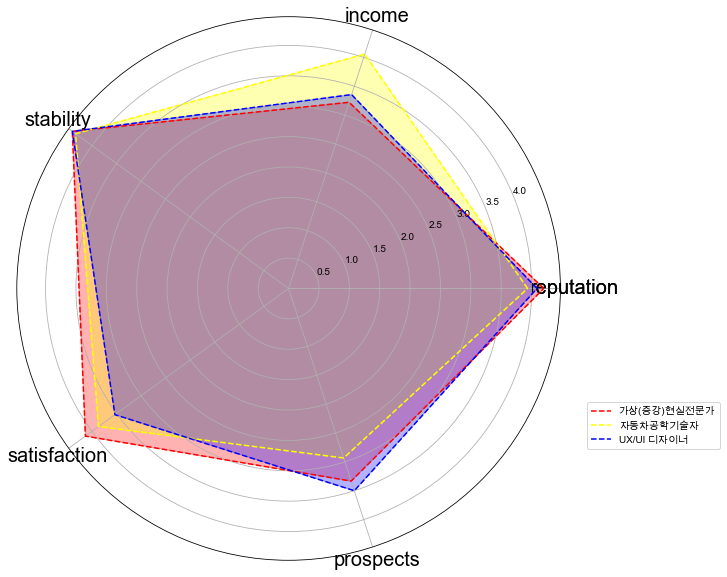

In [360]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='red')
ax.fill(label_loc, numbers1, color='red', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='blue')
ax.fill(label_loc, numbers3, color='blue', alpha=0.3)

ax.legend(bbox_to_anchor=(1.04, 0.3))
plt.show()

#### case: 1010

In [186]:
for x in recommend_10[1010:1011]:
    result=rec_df.loc[x]
 
result_3=result.sort_values(by='mean',ascending=False).head(3)
result_idx=list(result_3.index)
result_idx

[19, 458, 517]

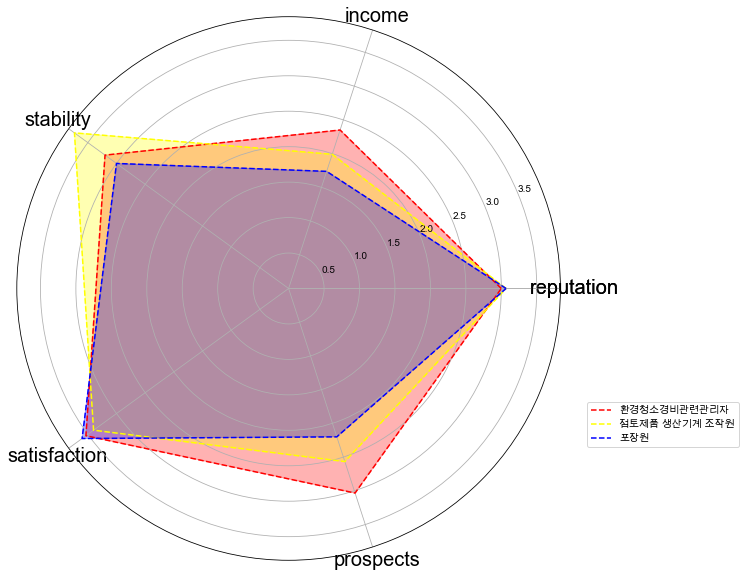

In [187]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='red')
ax.fill(label_loc, numbers1, color='red', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='blue')
ax.fill(label_loc, numbers3, color='blue', alpha=0.3)

ax.legend(bbox_to_anchor=(1.04, 0.3))
plt.show()

#### test case : 411

In [188]:
for x in recommend_10[411:412]:
    result=rec_df.loc[x]
 
result_3=result.sort_values(by='mean',ascending=False).head(3)
result_idx=list(result_3.index)
result_idx

[228, 229, 226]

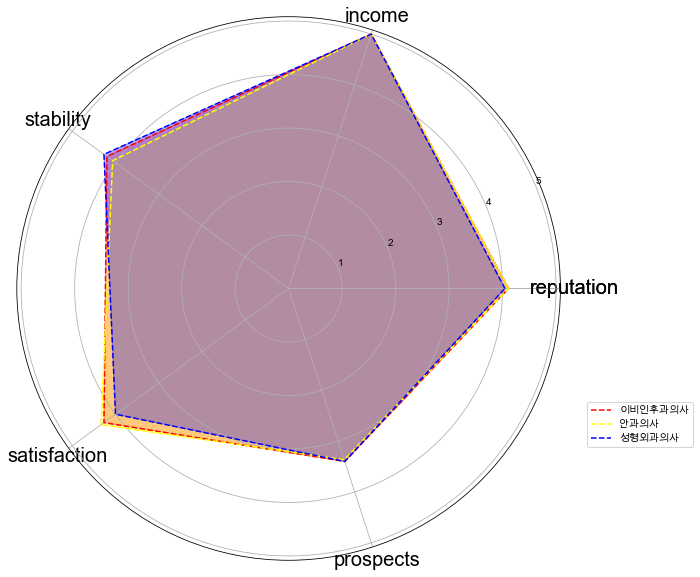

In [189]:
dict1={'Reputation':result_3.iloc[0,0], 
       'Income': result_3.iloc[0,1], 
       'Stability': result_3.iloc[0,2], 
       'Satisfaction': result_3.iloc[0,3], 
       'Prospects': result_3.iloc[0,4] }
dict2={'Reputation':result_3.iloc[1,0], 
       'Income': result_3.iloc[1,1], 
       'Stability': result_3.iloc[1,2], 
       'Satisfaction': result_3.iloc[1,3], 
       'Prospects': result_3.iloc[1,4] }
dict3={'Reputation':result_3.iloc[2,0], 
       'Income': result_3.iloc[2,1], 
       'Stability': result_3.iloc[2,2], 
       'Satisfaction': result_3.iloc[2,3], 
       'Prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='red')
ax.fill(label_loc, numbers1, color='red', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='blue')
ax.fill(label_loc, numbers3, color='blue', alpha=0.3)

ax.legend(bbox_to_anchor=(1.04, 0.3))
plt.show()

---

# real test case!!!!!!!!!!!

In [81]:
know_comb.columns[:-1]

Index(['cq1', 'cq3', 'cq4', 'cq7', 'cq8', 'cq9', 'cq12', 'cq13', 'cq14',
       'cq15',
       ...
       'vq12', 'vq13', 'bq1', 'bq2', 'bq7', 'bq9', 'bq10', 'bq11', 'bq24',
       'bq26_1'],
      dtype='object', length=122)

In [86]:
data=pd.read_excel('../KNOW_data/job_recommendation_survey.xlsx')
data = data.iloc[:,2:]
data.columns=know_comb.columns[:-1]
data.tail(2)

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq12,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1
15,④ 1주일에 한 번 이상 그러나 매일 하지 않음,② 1년에 한 번 이상 그러나 매달하지 않음,③ 1개월에 한 번 이상 그러나 매주 하지 않음,④ 매우 중요함,③ 중요함,③ 중요함,③ 1개월에 한 번 이상 그러나 매주 받지 않음,② 1년에 한 번 이상 그러나 매달하지 않음,④ 1주일에 한 번 이상 그러나 매일 하지 않음,③ 1개월에 한 번 이상 그러나 매주 하지 않음,...,④ 그렇다,③ 보통이다,"18 예술, 스포츠 및 여가관련 서비스업",1 민간회사 또는 개인 사업체 (외국인회사 포함),5 대학교 졸업,4 그렇다,4 그렇다,4 그렇다,2 여자,영남대학교 산업디자인학과
16,④ 1주일에 한 번 이상 그러나 매일 하지 않음,② 1년에 한 번 이상 그러나 매달하지 않음,② 1년에 한 번 이상 그러나 매달하지 않음,④ 매우 중요함,④ 매우 중요함,④ 매우 중요함,③ 1개월에 한 번 이상 그러나 매주 받지 않음,② 1년에 한 번 이상 그러나 매달하지 않음,④ 1주일에 한 번 이상 그러나 매일 하지 않음,③ 1개월에 한 번 이상 그러나 매주 하지 않음,...,⑤ 매우 그렇다,⑤ 매우 그렇다,"18 예술, 스포츠 및 여가관련 서비스업",4 특정회사나 사업체에 소속되어 있지 않음 (자영업 포함),1 중학교 졸업 이하,4 그렇다,4 그렇다,5 아주 그렇다,2 여자,영남대학고 트랜스아트과


In [2]:
# data=pd.read_csv('../KNOW_data/job_recommendation_survey.csv')
# data = data.iloc[:,2:]
# data.columns=know_comb.columns[:-1]
# data.tail(5)

In [213]:
data.iloc[0,i][0]

'②'

In [83]:
num=dict()
num['⓪']=0
num['①']=1 
num['②']=2
num['③']=3
num['④']=4
num['⑤']=5
num['⑥']=6
num['⑦']=7
print(num)

{'⓪': 0, '①': 1, '②': 2, '③': 3, '④': 4, '⑤': 5, '⑥': 6, '⑦': 7}


In [87]:
length=len(data)
cols=data.columns[:-1]
for i in range(len(cols)):
    for j in range(length):
        n=data.iloc[j,i][0]
        try:
            data.iloc[j,i]=num[n]
        except:
            data.iloc[j,i]=data.iloc[j,i][0]
#         data.iloc[j,i]=data.iloc[j,i][0]
#         data.iloc[j,i]=data.iloc[j,i][0]
data.tail(5)
#         print(x[0])
#     print()
#     print(data[col])
    

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq12,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1
12,5,5,5,2,2,4,3,3,5,4,...,3,4,1,4,6,4,4,5,2,한국어교육
13,4,4,4,2,2,2,2,2,5,4,...,3,4,1,2,5,4,4,4,2,경영
14,5,2,2,4,4,4,3,1,4,1,...,3,4,2,6,5,4,4,5,2,프랑스어문학과
15,4,2,3,4,3,3,3,2,4,3,...,4,3,1,1,5,4,4,4,2,영남대학교 산업디자인학과
16,4,2,2,4,4,4,3,2,4,3,...,5,5,1,4,1,4,4,5,2,영남대학고 트랜스아트과


In [239]:
data.to_csv('../KNOW_data/experiment.csv')

In [547]:
max(know_comb['bq26_1'].unique())

860

In [401]:
# 상담심리 : 349
know_comb.iloc[431,-2]

349

In [465]:
# 통계 : 784
know_comb.iloc[648,-2]

784

In [495]:
# 도시 : 184
know_comb.iloc[2083,-2]

184

In [491]:
# 사회 : 323
know_comb.iloc[101,-2]

323

In [493]:
# 물류 : 243
know_comb.iloc[6022,-2]

243

In [517]:
# 영문 : 502(영어영문), 490(영문)
know_comb.iloc[2922,-2]

502

In [519]:
# 경영 : 27
know_comb.iloc[4,-2]

27

In [648]:
# 프랑스어 304, 796
print(know_comb.iloc[3973,-2])
print(know_comb.iloc[5035,-2])

304
796


In [ ]:
# 트랜스아트 
know_comb.iloc[4,-2]

In [89]:
# 산업디자인 342
know_comb.iloc[666,-2]

342

In [92]:
data.iloc[0,-1]=757
data.iloc[1,-1]=129
data.iloc[2,-1]=395
data.iloc[3,-1]=349
data.iloc[4,-1]=205
data.iloc[5,-1]=784
data.iloc[6,-1]=184
data.iloc[7,-1]=323
data.iloc[8,-1]=243
data.iloc[9,-1]=490 # 502
data.iloc[10,-1]=27
data.iloc[11,-1]=395
data.iloc[12,-1]=861
data.iloc[13,-1]=27
data.iloc[14,-1]=304 # 796
data.iloc[15,-1]=342
data.iloc[16,-1]=862

In [93]:
data

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq12,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1
0,5,5,5,4,3,4,3,2,5,4,...,3,4,1,3,5,2,4,4,1,757
1,4,1,5,4,3,3,2,2,5,3,...,4,4,1,1,5,4,5,4,1,129
2,4,2,4,3,1,3,3,1,5,2,...,2,3,1,1,6,4,4,4,2,395
3,4,3,4,4,3,3,3,2,4,4,...,3,4,1,1,6,4,4,5,1,349
4,4,4,4,2,2,2,3,3,4,4,...,1,3,1,1,5,3,4,3,2,205
5,5,4,4,3,2,3,3,3,4,3,...,3,4,1,1,5,3,4,4,2,784
6,5,4,5,4,3,5,3,2,4,3,...,4,5,1,5,7,4,5,4,1,184
7,5,4,5,3,2,3,3,4,5,4,...,5,5,1,1,5,4,5,4,2,323
8,4,1,3,3,2,4,2,2,5,2,...,5,5,1,1,5,3,5,3,1,243
9,4,4,4,4,3,4,4,2,4,3,...,4,4,1,2,5,4,4,4,2,490


In [94]:
# 모델
rf_pred = rf.predict(data)
rf_proba = rf.predict_proba(data)

In [95]:
print(rf_pred)

[158501 158501 133202 158501 306902 134401 221102 412003 414502 158501
  12301 158501 121102 901401 212201 901401 901401]


In [96]:
for x in rf_pred[5:]:
    print(job[x])

웹 마스터(운영자)
검사
잡지기자
작곡가
비파괴 검사원
마케팅·광고·홍보 관리자(부서장)
비파괴 검사원
화학연구원
육묘 및 화훼작물재배자
초등학교 교사
육묘 및 화훼작물재배자
육묘 및 화훼작물재배자


In [97]:
testdf=pd.DataFrame(rf_proba).transpose()
testdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.002251,0.000000,0.000000,0.001111,0.003333,0.000000,0.005556,0.007778,0.012222,0.001111,0.002254,0.005556,0.002222,0.000025,0.000000,0.000000,0.000000
1,0.006698,0.004788,0.014444,0.007852,0.002253,0.002315,0.002222,0.018889,0.011111,0.007815,0.005556,0.013333,0.002222,0.001111,0.001111,0.002222,0.001111
2,0.000057,0.000000,0.000000,0.001131,0.001111,0.000000,0.002222,0.005556,0.002222,0.004444,0.010032,0.002284,0.000000,0.001136,0.001111,0.000000,0.000000
3,0.008889,0.000000,0.007778,0.004533,0.003333,0.001529,0.002222,0.008889,0.004444,0.002222,0.003365,0.004444,0.005556,0.005831,0.001111,0.002222,0.001111
4,0.003424,0.006705,0.021111,0.005600,0.015617,0.009056,0.006667,0.018889,0.003333,0.011148,0.023519,0.003333,0.002222,0.003450,0.001111,0.010000,0.002222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,0.007778,0.021111,0.017778,0.016667,0.021111,0.020000,0.011111,0.017778,0.011111,0.030000,0.012222,0.026667,0.015556,0.024444,0.006667,0.025556,0.014444
524,0.013333,0.012255,0.011111,0.011111,0.011111,0.004444,0.003333,0.007778,0.005556,0.017778,0.001111,0.017778,0.011111,0.011111,0.004444,0.006667,0.034444
525,0.026667,0.014444,0.002222,0.007778,0.008889,0.007778,0.002222,0.006667,0.005556,0.017778,0.003333,0.026667,0.011111,0.013333,0.002222,0.010000,0.003333
526,0.003333,0.003333,0.004444,0.035556,0.013333,0.031111,0.014444,0.010000,0.012222,0.021111,0.003333,0.014444,0.010000,0.007778,0.005556,0.013333,0.015556


In [98]:
length=len(data)
recommend_10=[]
for i in range(length):
    tmp=list(testdf.sort_values(by=i, ascending=False).head(10).index)
    recommend_10.append(tmp)
recommend_10

[[187, 150, 522, 525, 148, 152, 527, 168, 135, 113],
 [187, 522, 523, 521, 519, 159, 140, 134, 525, 145],
 [113, 296, 4, 297, 523, 521, 291, 148, 519, 48],
 [187, 526, 146, 128, 522, 521, 148, 519, 523, 135],
 [254, 268, 282, 270, 523, 521, 4, 307, 187, 283],
 [124, 526, 521, 49, 523, 121, 522, 46, 44, 114],
 [205, 84, 11, 208, 204, 206, 273, 10, 190, 187],
 [270, 187, 291, 150, 119, 4, 1, 523, 269, 264],
 [282, 50, 369, 187, 270, 519, 521, 254, 30, 205],
 [187, 523, 526, 340, 525, 524, 522, 266, 193, 521],
 [4, 376, 213, 212, 20, 291, 46, 45, 83, 523],
 [187, 519, 525, 523, 96, 156, 524, 521, 526, 522],
 [93, 522, 187, 166, 177, 100, 96, 168, 188, 521],
 [521, 523, 187, 519, 104, 522, 525, 49, 367, 180],
 [193, 215, 197, 192, 198, 195, 202, 194, 88, 196],
 [521, 523, 522, 294, 527, 113, 519, 289, 134, 290],
 [521, 519, 524, 490, 275, 527, 522, 518, 526, 523]]

In [101]:
for i in range(13,length):
#     print('[ 대분류 :',category[rf_cate_pred[i]],' ]')
    for sub in recommend_10[i]:
        print(jobdict[sub])
#             print()
    print('-'*30)

육묘 및 화훼작물재배자
낙농 종사원
비파괴 검사원
채소·특용작물 재배원
농림어업 시험원
조경원
조림·산림경영인 및 벌목원
경리사무원
부동산중개인
섬유공학기술자
------------------------------
초등학교 교사
보육교사
문리학원강사
중·고등학교 교사
외국어강사
보조교사
학습지·교육교구 방문 강사
특수교육 교사
심리학연구원
유치원 교사
------------------------------
육묘 및 화훼작물재배자
낙농 종사원
조경원
웹 디자이너
어부 및 해녀
가상(증강)현실전문가
채소·특용작물 재배원
제품 디자이너
토목구조 설계 기술자
의상 디자이너
------------------------------
육묘 및 화훼작물재배자
채소·특용작물 재배원
가축 사육 종사원
한복 제조원
화가
어부 및 해녀
조경원
곡식작물 재배원
양식원
낙농 종사원
------------------------------


In [321]:
recommend_10[0]

[187, 150, 522, 525, 148, 152, 527, 168, 135, 113]

In [102]:
length=len(data)
recommend_15=[]
for i in range(length):
    tmp=list(testdf.sort_values(by=i, ascending=False).head(15).index)
    recommend_15.append(tmp)
recommend_15

[[187, 150, 522, 525, 148, 152, 527, 168, 135, 113, 160, 146, 519, 15, 524],
 [187, 522, 523, 521, 519, 159, 140, 134, 525, 145, 155, 189, 518, 128, 524],
 [113, 296, 4, 297, 523, 521, 291, 148, 519, 48, 187, 294, 119, 1, 72],
 [187, 526, 146, 128, 522, 521, 148, 519, 523, 135, 155, 101, 156, 150, 96],
 [254, 268, 282, 270, 523, 521, 4, 307, 187, 283, 522, 526, 519, 291, 290],
 [124, 526, 521, 49, 523, 121, 522, 46, 44, 114, 290, 376, 57, 154, 289],
 [205, 84, 11, 208, 204, 206, 273, 10, 190, 187, 92, 369, 7, 9, 87],
 [270, 187, 291, 150, 119, 4, 1, 523, 269, 264, 268, 522, 91, 298, 113],
 [282, 50, 369, 187, 270, 519, 521, 254, 30, 205, 307, 269, 299, 149, 206],
 [187, 523, 526, 340, 525, 524, 522, 266, 193, 521, 291, 4, 315, 519, 148],
 [4, 376, 213, 212, 20, 291, 46, 45, 83, 523, 289, 90, 35, 2, 55],
 [187, 519, 525, 523, 96, 156, 524, 521, 526, 522, 150, 148, 1, 146, 169],
 [93, 522, 187, 166, 177, 100, 96, 168, 188, 521, 149, 169, 173, 523, 148],
 [521, 523, 187, 519, 104, 522, 52

In [103]:
length=len(data)
recommend_20=[]
for i in range(length):
    tmp=list(testdf.sort_values(by=i, ascending=False).head(20).index)
    recommend_20.append(tmp)
recommend_20

[[187,
  150,
  522,
  525,
  148,
  152,
  527,
  168,
  135,
  113,
  160,
  146,
  519,
  15,
  524,
  521,
  170,
  169,
  149,
  189],
 [187,
  522,
  523,
  521,
  519,
  159,
  140,
  134,
  525,
  145,
  155,
  189,
  518,
  128,
  524,
  426,
  156,
  146,
  135,
  132],
 [113,
  296,
  4,
  297,
  523,
  521,
  291,
  148,
  519,
  48,
  187,
  294,
  119,
  1,
  72,
  522,
  150,
  88,
  295,
  86],
 [187,
  526,
  146,
  128,
  522,
  521,
  148,
  519,
  523,
  135,
  155,
  101,
  156,
  150,
  96,
  524,
  144,
  159,
  188,
  26],
 [254,
  268,
  282,
  270,
  523,
  521,
  4,
  307,
  187,
  283,
  522,
  526,
  519,
  291,
  290,
  189,
  294,
  369,
  289,
  524],
 [124,
  526,
  521,
  49,
  523,
  121,
  522,
  46,
  44,
  114,
  290,
  376,
  57,
  154,
  289,
  187,
  519,
  50,
  296,
  488],
 [205,
  84,
  11,
  208,
  204,
  206,
  273,
  10,
  190,
  187,
  92,
  369,
  7,
  9,
  87,
  94,
  526,
  129,
  89,
  90],
 [270,
  187,
  291,
  150,
  119,
  4,
  1

In [104]:
for i in range(length):
    print(i)
#     print('[ 대분류 :',category[rf_cate_pred[i]],' ]')
    for sub in recommend_20[i]:
        print(jobdict[sub])
#             print()
    print('-'*30)

0
비파괴 검사원
로봇공학기술자
조경원
조림·산림경영인 및 벌목원
자동차공학기술자
재료(금속)공학기술자
어부 및 해녀
태양광발전연구및개발자
토목감리 기술자
가상(증강)현실전문가
반도체공학 기술자 및 연구원
플랜트기계공학기술자
채소·특용작물 재배원
예술·디자인·방송 관리자
가축 사육 종사원
육묘 및 화훼작물재배자
원자력공학기술자
풍력발전연구및개발자
조선?해양공학기술자
제도사(캐드원)
------------------------------
1
비파괴 검사원
조경원
낙농 종사원
육묘 및 화훼작물재배자
채소·특용작물 재배원
전자제품 및 부품 개발기술자
교통계획·설계가
토목구조 설계 기술자
조림·산림경영인 및 벌목원
건설기계공학 기술자 및 연구원
발전설비 기술자
제도사(캐드원)
곡식작물 재배원
건축가(건축설계사)
가축 사육 종사원
공업기계설치 및 정비원
송·배전설비 기술자
플랜트기계공학기술자
토목감리 기술자
건축안전·환경·품질·에너지관리 기술자
------------------------------
2
가상(증강)현실전문가
영상그래픽 디자이너
마케팅·광고·홍보 관리자(부서장)
UX/UI 디자이너
낙농 종사원
육묘 및 화훼작물재배자
패션소품 디자이너(의상 제외)
자동차공학기술자
채소·특용작물 재배원
회계사무원
비파괴 검사원
웹 디자이너
빅데이터분석가
기업 고위임원
보험계리사
조경원
로봇공학기술자
심리학연구원
게임그래픽 디자이너
언어학연구원
------------------------------
3
비파괴 검사원
양식원
플랜트기계공학기술자
건축가(건축설계사)
조경원
육묘 및 화훼작물재배자
자동차공학기술자
채소·특용작물 재배원
낙농 종사원
토목감리 기술자
발전설비 기술자
수산학연구원
송·배전설비 기술자
로봇공학기술자
지질학연구원
가축 사육 종사원
건설자재 시험원
전자제품 및 부품 개발기술자
3D 프린팅모델러
경영·진단 전문가
------------------------------
4
청능사
신문기자
작곡가
잡지기자
낙농 종사원
육묘 및 화훼작물재배자
마케팅·광고·홍보 관리자

In [583]:
# 승완님
import numpy as np

for x in recommend_15[0:1]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[150, 113, 148]

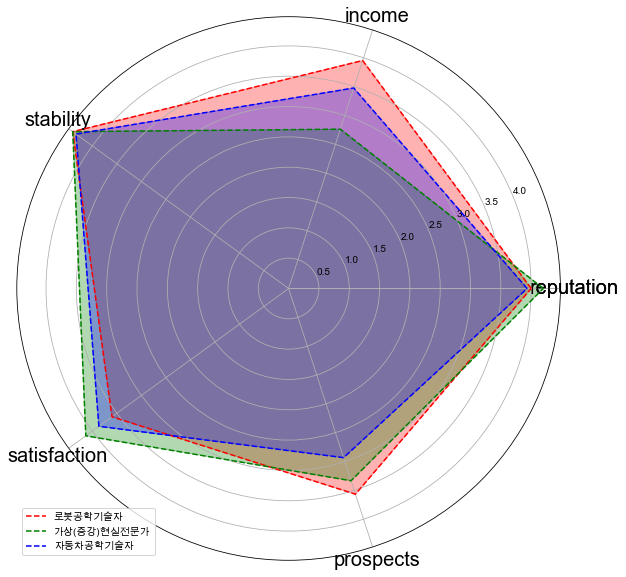

In [584]:

dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='red')
ax.fill(label_loc, numbers1, color='red', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='green')
ax.fill(label_loc, numbers2, color='green', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='blue')
ax.fill(label_loc, numbers3, color='blue', alpha=0.3)

ax.legend()
plt.show()

In [595]:
# 영민님
import numpy as np

for x in recommend_15[1:2]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[134, 145, 159]

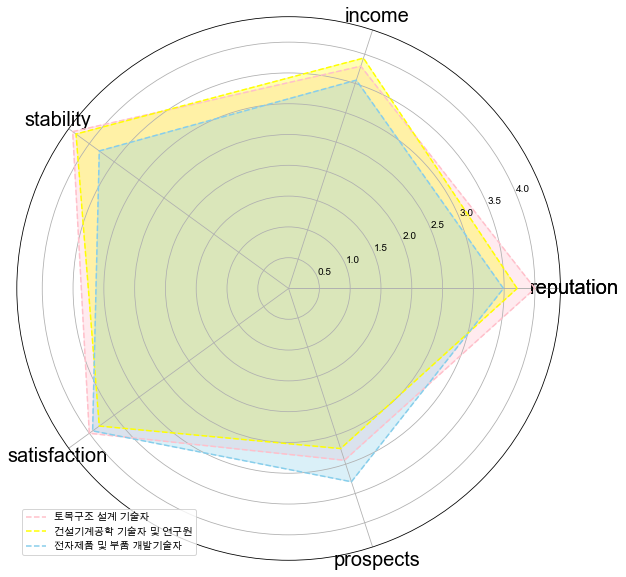

In [596]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend()
plt.show()

In [593]:
# 유나님
import numpy as np

for x in recommend_15[2:3]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[1, 113, 148]

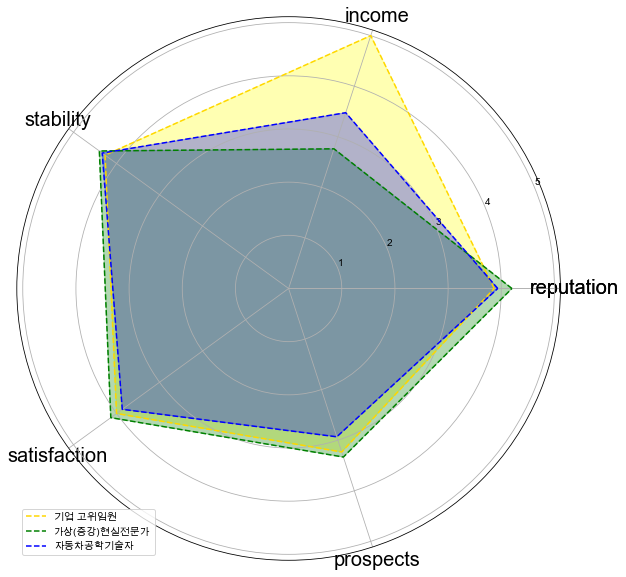

In [594]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='gold')
ax.fill(label_loc, numbers1, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='green')
ax.fill(label_loc, numbers2, color='green', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='blue')
ax.fill(label_loc, numbers3, color='blue', alpha=0.3)

ax.legend()
plt.show()

In [398]:
know_comb_major=pd.read_csv('../KNOW_data/know_comb.csv')
know_comb_major.head()

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1,knowcode
0,5,4,4,4,5,4,3,3,5,4,...,4,15,2,5,5,4,5,1,정치외교,11102
1,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,3,4,3,1,경영학,11102
2,5,5,3,5,5,4,4,3,5,4,...,2,15,2,5,4,5,4,1,행정학,11102
3,4,4,4,4,4,5,3,2,5,4,...,4,15,2,5,5,4,3,1,행정학,11102
4,4,5,5,4,3,5,2,1,5,3,...,4,15,2,5,4,4,4,1,경영학,11102


In [597]:
# 승태님
import numpy as np

for x in recommend_15[3:4]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[150, 148, 128]

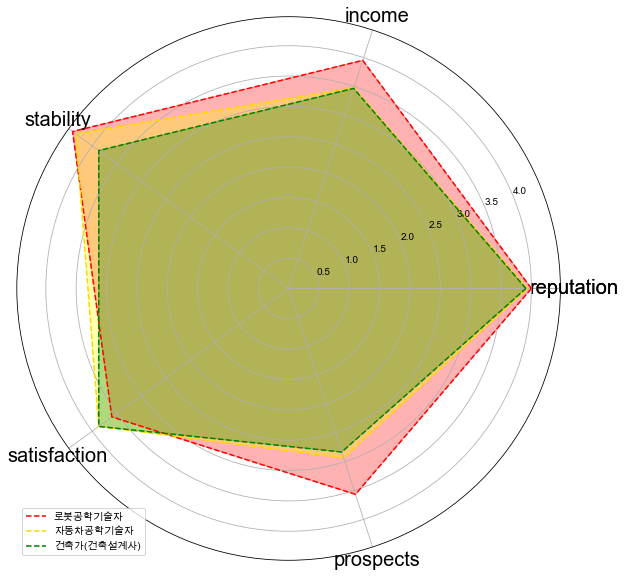

In [592]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='red')
ax.fill(label_loc, numbers1, color='red', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='gold')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='green')
ax.fill(label_loc, numbers3, color='green', alpha=0.3)

ax.legend()
plt.show()

In [404]:
# 레저스포츠 : 205
know_comb.iloc[4802,-2]

205

In [405]:
# 식품영양 : 423
know_comb.iloc[655,-2]

423

In [598]:
# 인영님
import numpy as np

for x in recommend_15[4:5]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[290, 4, 307]

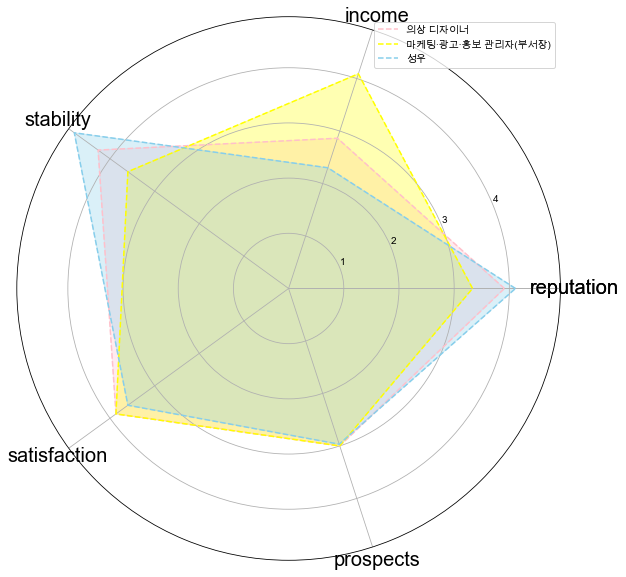

In [599]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend()
plt.show()

In [432]:
data.iloc[4,-1]=423

In [433]:
# 인영님(2)
import numpy as np

for x in recommend_10[4:5]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[4, 307, 254]

- 결과는 동일!

In [587]:
# 서영님
import numpy as np

for x in recommend_15[5:6]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[290, 154, 289]

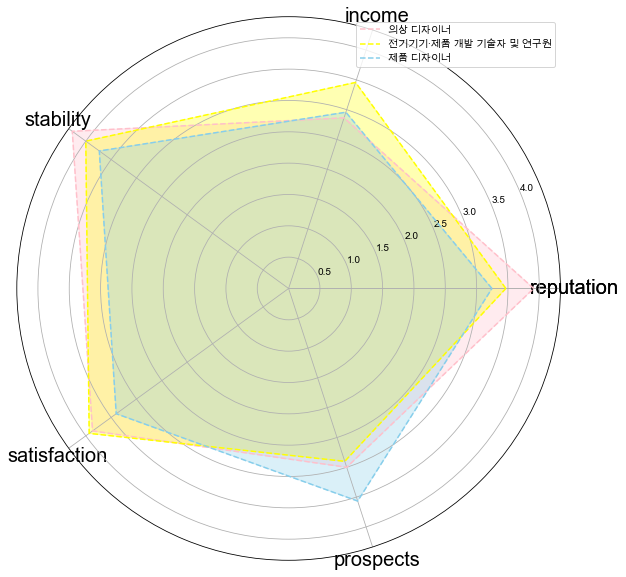

In [588]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend()
plt.show()

In [600]:
# 기태
import numpy as np

for x in recommend_15[6:7]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[84, 206, 11]

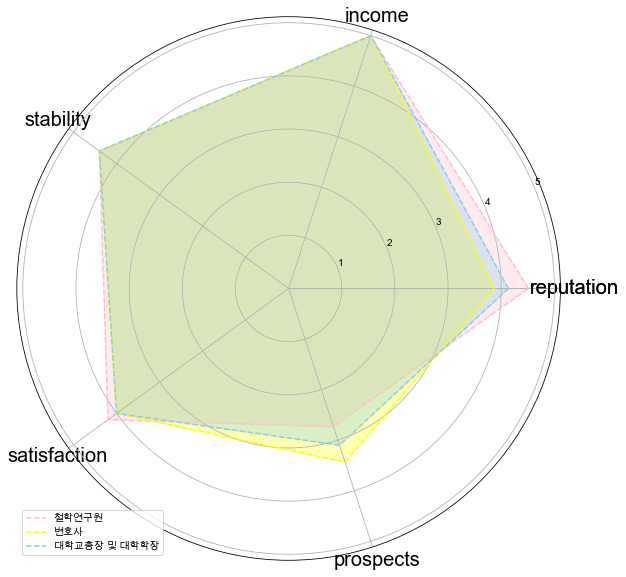

In [601]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend()
plt.show()

In [615]:
# 하은
import numpy as np

for x in recommend_15[7:8]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='reputation',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[113, 150, 270]

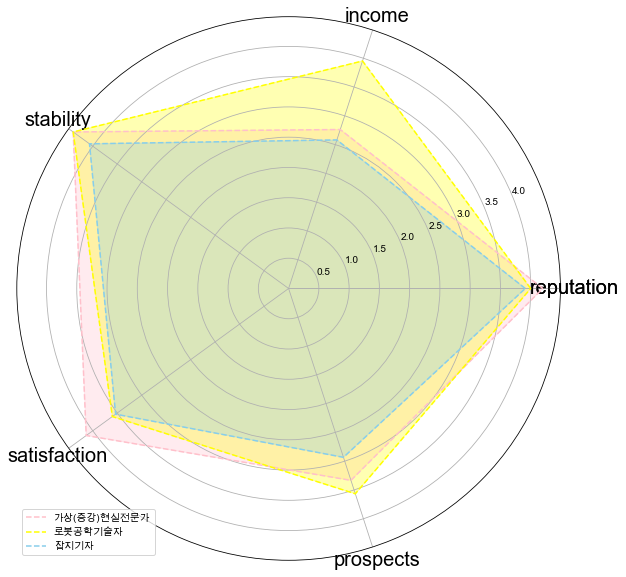

In [616]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend()
plt.show()

In [619]:
# 민호
import numpy as np

for x in recommend_15[8:9]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[206, 205, 30]

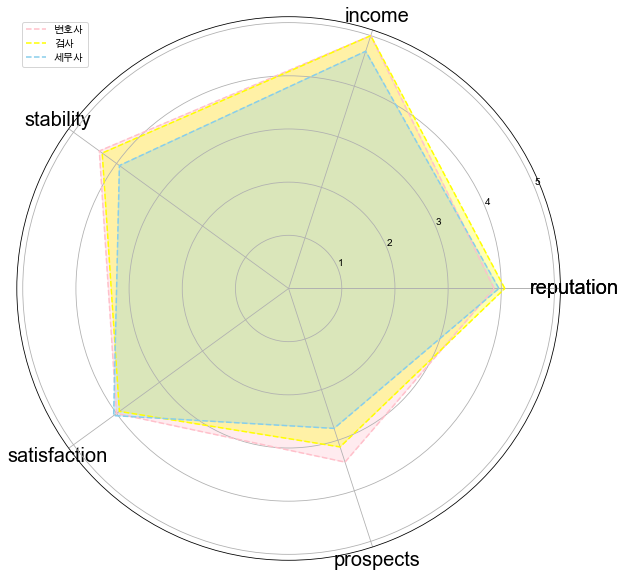

In [620]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend()
plt.show()

In [678]:
# 나영
import numpy as np

for x in recommend_20[9:10]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='satisfaction',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[85, 291, 148]

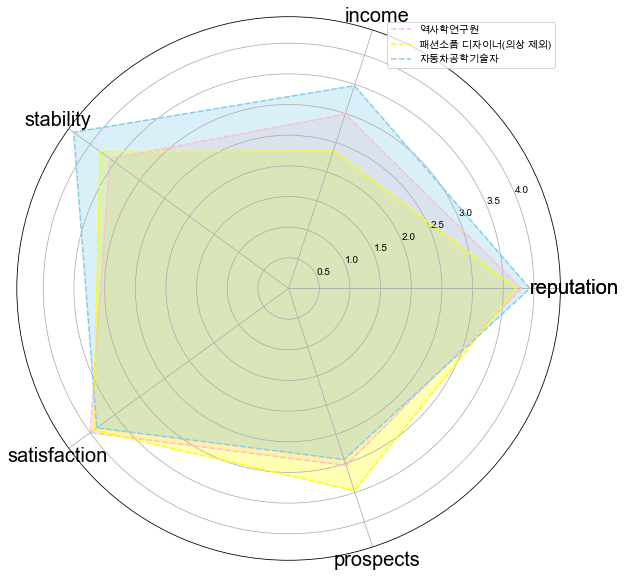

In [679]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend()
plt.show()

In [680]:
# 유빈
import numpy as np

for x in recommend_20[10:11]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

[90, 2, 290]

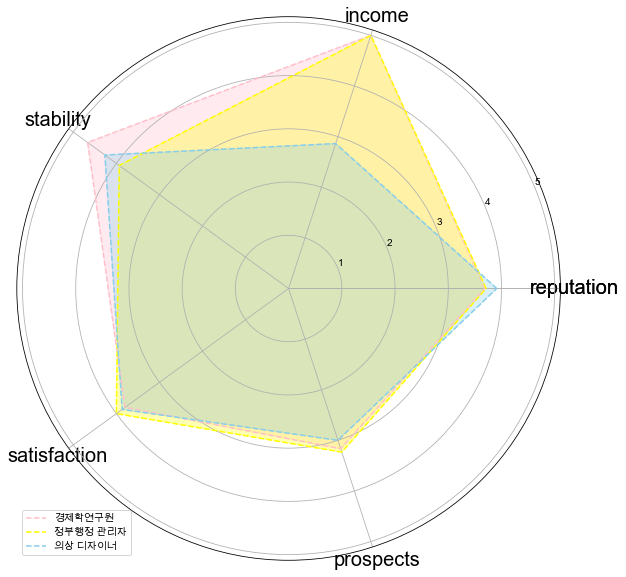

In [681]:
dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend()
plt.show()

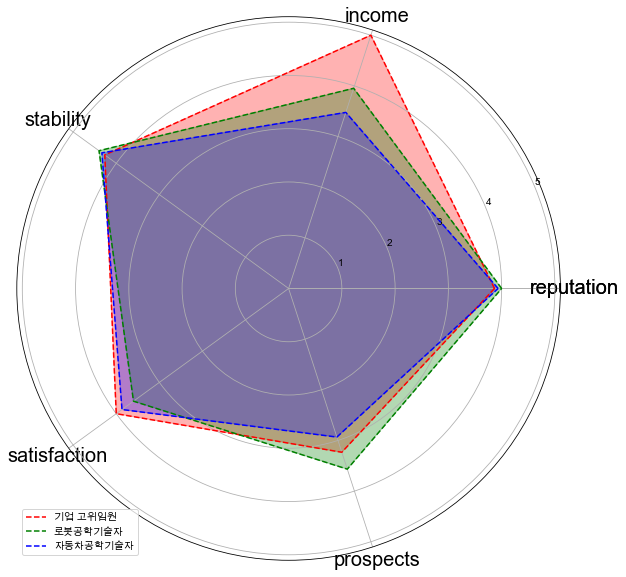

In [626]:
# 전도사님
import numpy as np

for x in recommend_15[11:12]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='red')
ax.fill(label_loc, numbers1, color='red', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='green')
ax.fill(label_loc, numbers2, color='green', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='blue')
ax.fill(label_loc, numbers3, color='blue', alpha=0.3)

ax.legend()
plt.show()

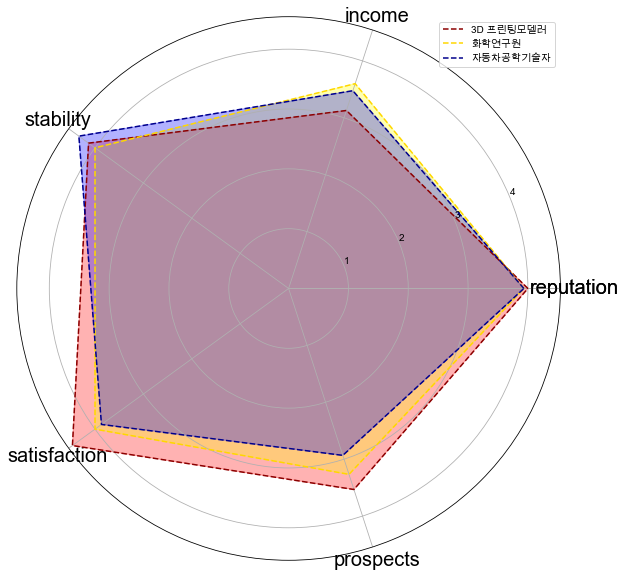

In [627]:
# 강하
import numpy as np

for x in recommend_15[12:13]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='darkred')
ax.fill(label_loc, numbers1, color='red', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='gold')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='darkblue')
ax.fill(label_loc, numbers3, color='blue', alpha=0.3)

ax.legend()
plt.show()

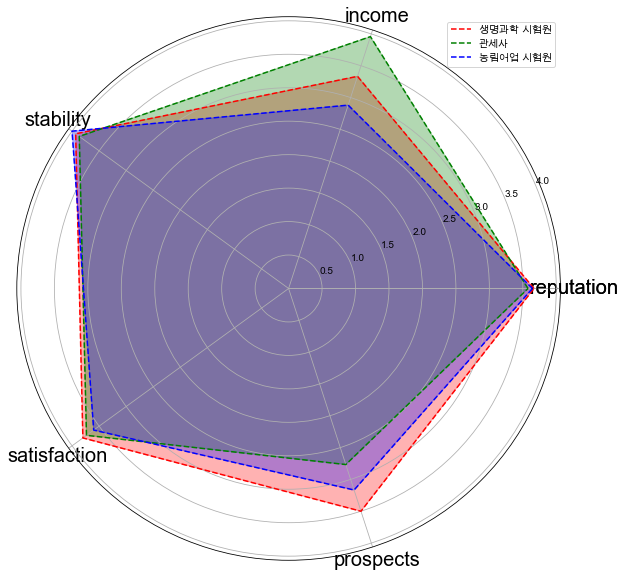

In [628]:
# 강문
import numpy as np

for x in recommend_15[13:14]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='red')
ax.fill(label_loc, numbers1, color='red', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='green')
ax.fill(label_loc, numbers2, color='green', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='blue')
ax.fill(label_loc, numbers3, color='blue', alpha=0.3)

ax.legend()
plt.show()

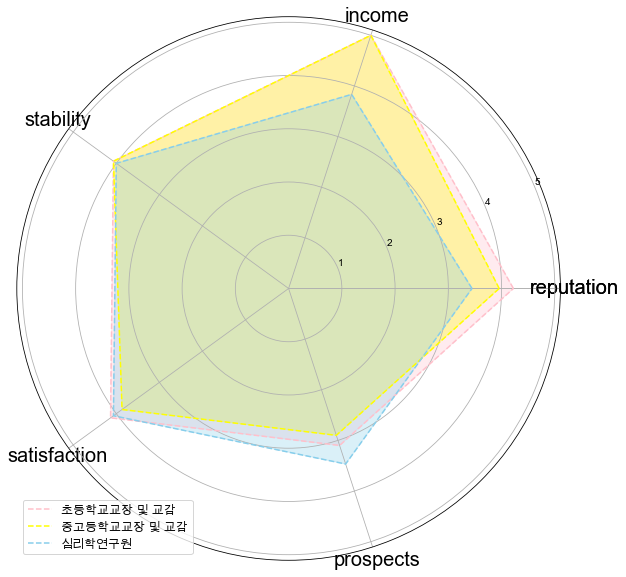

In [132]:
# 시연
import numpy as np

for x in recommend_15[14:15]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend(fontsize=12)
plt.show()

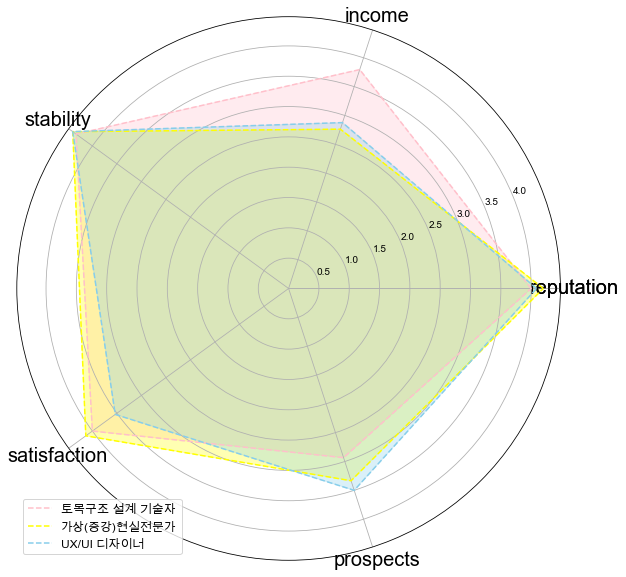

In [144]:
# 15
import numpy as np

for x in recommend_20[15:16]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend(fontsize=12)
plt.show()

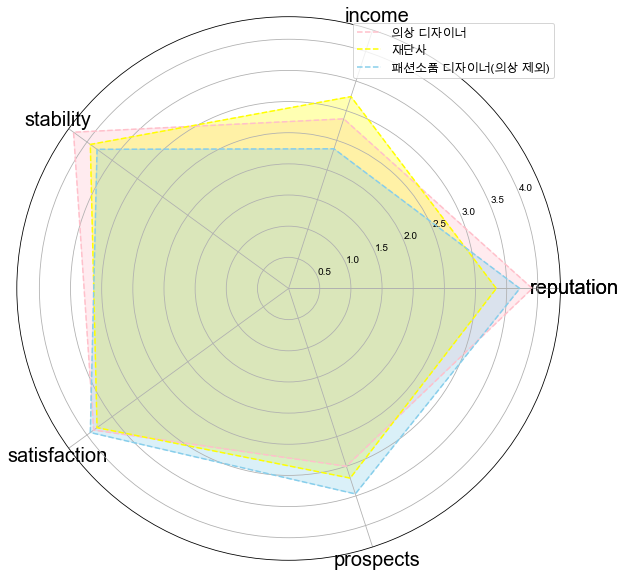

In [140]:
# 16
import numpy as np

for x in recommend_20[16:17]:
    result=rec_df.loc[x]

result_3=result.sort_values(by='mean',ascending=False).head(3)

result_idx=list(result_3.index)
result_idx

dict1={'reputation':result_3.iloc[0,0], 
       'income': result_3.iloc[0,1], 
       'stability': result_3.iloc[0,2], 
       'satisfaction': result_3.iloc[0,3], 
       'prospects': result_3.iloc[0,4] }
dict2={'reputation':result_3.iloc[1,0], 
       'income': result_3.iloc[1,1], 
       'stability': result_3.iloc[1,2], 
       'satisfaction': result_3.iloc[1,3], 
       'prospects': result_3.iloc[1,4] }
dict3={'reputation':result_3.iloc[2,0], 
       'income': result_3.iloc[2,1], 
       'stability': result_3.iloc[2,2], 
       'satisfaction': result_3.iloc[2,3], 
       'prospects': result_3.iloc[2,4] }

categories1=list(dict1.keys()) #xticks 설정을 위한 기본값
categories1=[*categories1, categories1[0]]

numbers1=list(dict1.values())
numbers1=[*numbers1, numbers1[0]]

numbers2=list(dict2.values())
numbers2=[*numbers2, numbers2[0]]

numbers3=list(dict3.values())
numbers3=[*numbers3, numbers3[0]]

label_loc=np.linspace(start=0, stop=2*np.pi, num=len(numbers1))
plt.figure(figsize=(10,10))
ax=plt.subplot(polar=True)
plt.xticks(label_loc, labels=categories1, fontsize=20)

ax.plot(label_loc, numbers1, label=jobdict[result_idx[0]], linestyle='dashed', color='pink')
ax.fill(label_loc, numbers1, color='pink', alpha=0.3)

ax.plot(label_loc, numbers2, label=jobdict[result_idx[1]], linestyle='dashed', color='yellow')
ax.fill(label_loc, numbers2, color='yellow', alpha=0.3)

ax.plot(label_loc, numbers3, label=jobdict[result_idx[2]], linestyle='dashed', color='skyblue')
ax.fill(label_loc, numbers3, color='skyblue', alpha=0.3)

ax.legend(fontsize=12)
plt.show()

In [106]:
data.tail()

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq12,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq24,bq26_1
12,5,5,5,2,2,4,3,3,5,4,...,3,4,1,4,6,4,4,5,2,861
13,4,4,4,2,2,2,2,2,5,4,...,3,4,1,2,5,4,4,4,2,27
14,5,2,2,4,4,4,3,1,4,1,...,3,4,2,6,5,4,4,5,2,304
15,4,2,3,4,3,3,3,2,4,3,...,4,3,1,1,5,4,4,4,2,342
16,4,2,2,4,4,4,3,2,4,3,...,5,5,1,4,1,4,4,5,2,862


------

### 컬럼 전부 사용한 데이터로 위 과정 반복

#### 전부 선정 (328개)

In [57]:
know_comb_all = pd.concat([k2018_mod.iloc[:,2:65], k2019_mod.iloc[:,2:84], k2020_mod.iloc[:,2:]], axis=1)
know_comb_all

,cq1,cq2,cq3,cq4,cq5,cq6,cq7,cq8,cq9,cq10,...,bq26,bq26_1,bq27_1,bq27_2,bq28,bq29,bq30_1,bq30_2,bq30_3,knowcode
0,5,4,4,4,4,4,4,5,4,5,...,5,정치외교,1,1,1,40,8500,8000,,11102
1,4,3,5,5,4,5,4,3,5,2,...,4,경영학,1,1,1,40,9700,8000,,11102
2,5,4,5,3,5,5,5,5,4,3,...,5,행정학,1,1,1,40,8500,8000,,11102
3,4,3,4,4,5,5,4,4,5,4,...,5,행정학,1,1,1,40,8800,8000,,11102
4,4,3,5,5,4,5,4,3,5,2,...,5,경영학,1,1,1,40,9500,8000,,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4,1,5,1,1,3,4,3,4,2,...,1,,2,6,1,32,,,2200,904201
7902,4,4,5,1,1,4,3,2,4,4,...,2,문과,2,6,1,40,,,2500,904201
7903,4,1,4,1,1,4,4,4,2,3,...,1,,2,6,1,24,,,1400,904201
7904,4,3,4,1,2,4,4,1,4,1,...,1,,2,6,1,32,,,2700,904201


In [58]:
know_comb_all = know_comb_all.replace(' ', '0')

In [59]:
import re

for i, row in know_comb_all.iterrows():
    know_comb_all.loc[i,'bq26_1'] = know_comb_all.loc[i,'bq26_1'].replace(' ', '')
    know_comb_all.loc[i,'bq26_1'] = re.sub('[학][과]$', '', know_comb_all.loc[i,'bq26_1'])
    know_comb_all.loc[i,'bq26_1'] = re.sub('[과학]$', '', know_comb_all.loc[i,'bq26_1'])

In [94]:
from sklearn.preprocessing import LabelEncoder

obj = []
encoders = {}
    
for col in know_comb_all.columns:
        
    try:
        know_comb_all[col] = know_comb_all[col].astype(int)
    except:
        try: 
            know_comb_all[col] = know_comb_all[col].astype(float)
        except:
            obj.append(col)
            encoder = LabelEncoder()
            know_comb_all[col] = know_comb_all[col].map(str)
            know_comb_all[col] = encoder.fit_transform(know_comb_all[col])
print(obj)

['bq4_1a', 'bq4_1b', 'bq4_1c', 'bq5_2', 'bq18_10', 'bq20_1', 'bq26_1']


In [ ]:
X = know_comb_all.iloc[:,:-1]
y = know_comb_all['knowcode']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=13)

#### feature_importances 중요도 순으로 상위 100개 선정

In [111]:
cols_100 = ['cq1','cq3','cq4','cq7','cq8','cq9','cq12','cq13','cq14','cq15','cq17','cq19','cq21','cq28','cq29','cq30','cq33','cq35','cq36','cq37','cq40','cq41','cq42','cq43','cq44','cq45','iq1','iq2','iq3','iq4','iq5','iq6','sq1','sq2','sq3','sq4','sq5','sq6','sq7','sq8','sq9','sq10','sq11','sq12','sq13','sq14','sq15','sq16','kq2_2','kq3_2','kq7_2','kq10_2','kq11_2','kq12_2','kq13_2','kq15_2','kq16_2','kq17_2','kq20_2','kq21_2','kq24_2','kq25_2','kq26_2','kq30_2','kq33_2','saq1_2','saq2_2','saq3_2','saq4_2','saq6_2','saq8_2','saq9_2','saq13_2','saq15_2','saq21_2','saq22_2','saq23_2','saq34_2','saq43_2','saq44_2','vq1','vq2','vq3','vq4','vq5','vq6','vq7','vq8','vq9','vq10','vq11','vq12','vq13','bq1','bq2','bq7','bq9','bq10','bq11','bq26_1','knowcode']

In [113]:
know_comb_100 = know_comb_all[cols_100]
know_comb_100

,cq1,cq3,cq4,cq7,cq8,cq9,cq12,cq13,cq14,cq15,...,vq12,vq13,bq1,bq2,bq7,bq9,bq10,bq11,bq26_1,knowcode
0,5,4,4,4,5,4,3,3,5,4,...,5,4,15,2,5,5,4,5,676,11102
1,4,5,5,4,3,5,2,1,5,3,...,4,4,15,2,5,3,4,3,27,11102
2,5,5,3,5,5,4,4,3,5,4,...,5,2,15,2,5,4,5,4,831,11102
3,4,4,4,4,4,5,3,2,5,4,...,5,4,15,2,5,5,4,3,831,11102
4,4,5,5,4,3,5,2,1,5,3,...,5,4,15,2,5,4,4,4,27,11102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,4,5,1,4,3,4,2,3,1,4,...,3,5,1,4,2,2,5,3,1,904201
7902,4,5,1,3,2,4,4,4,3,5,...,5,5,1,4,2,5,4,4,234,904201
7903,4,4,1,4,4,2,3,2,1,5,...,4,5,1,4,1,2,4,3,1,904201
7904,4,4,1,4,1,4,3,2,1,4,...,2,4,1,4,1,3,3,3,1,904201


In [ ]:
X = know_comb_100.iloc[:,:-1]
y = know_comb_100['knowcode']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=13)